## Линейные методы

### Метод главных компонент
Этап 1. Стандартизация данных

Этап 2. Вычисление матрицы ковариации

Этап 3. Вычисление собственных векторов и собственных значений матрицы ковариации

Этап 4. Отображение оригинальной выборки на линейное подмножество главных компонент


Text(0.5, 1.0, 'Метод главных компонент')

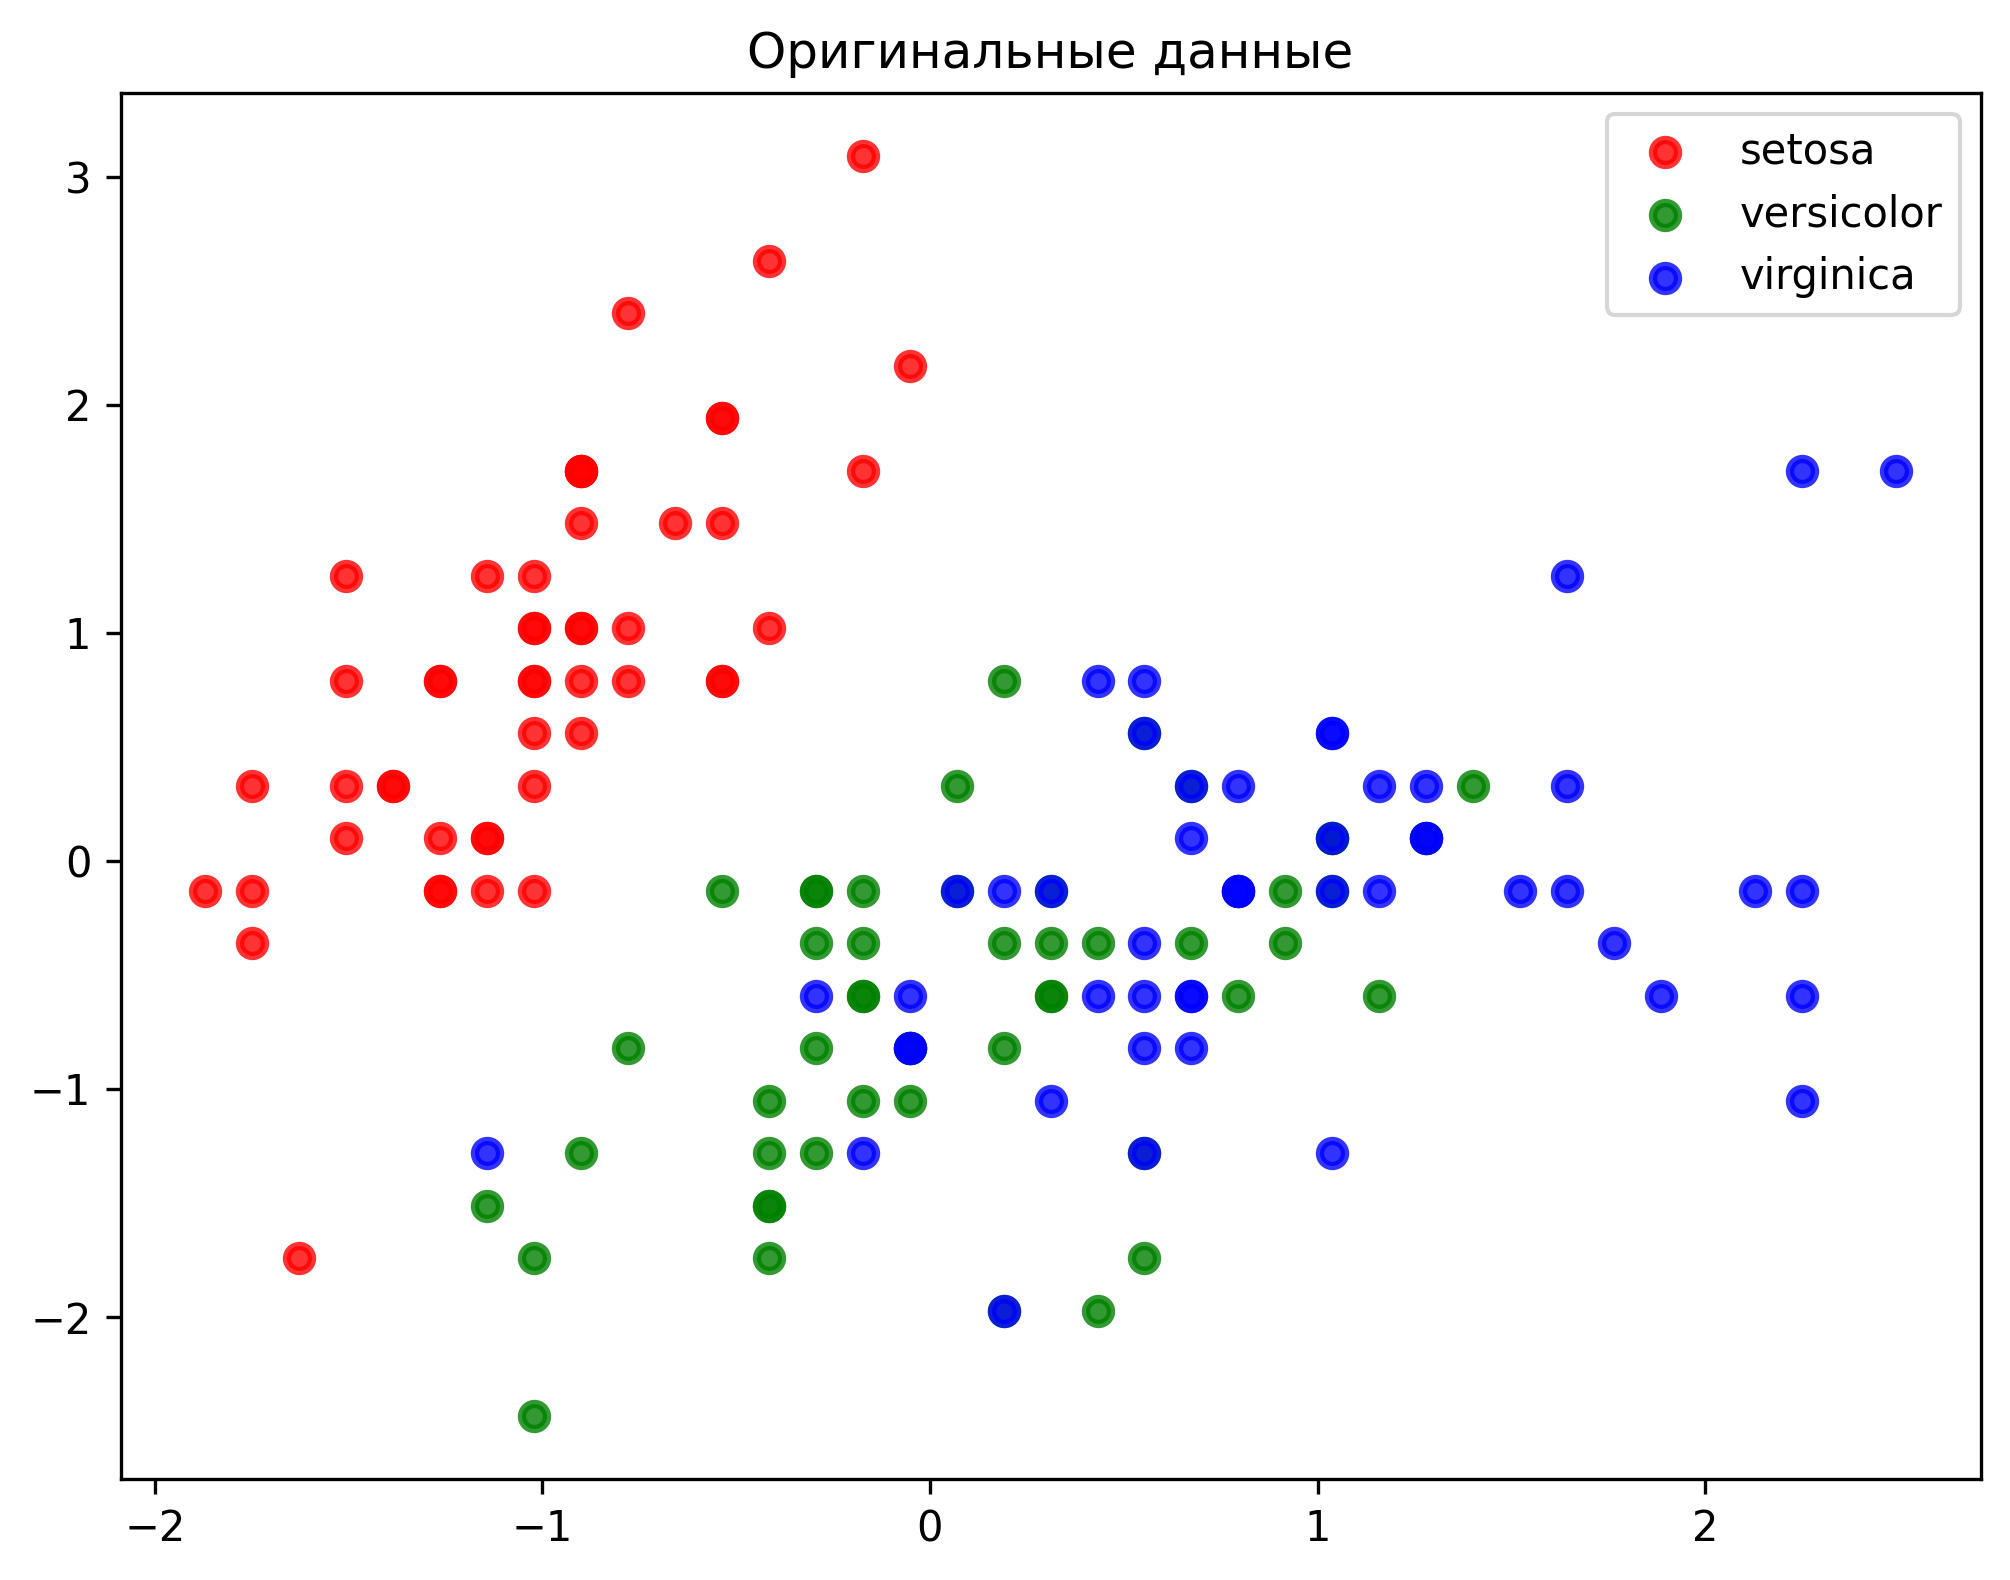

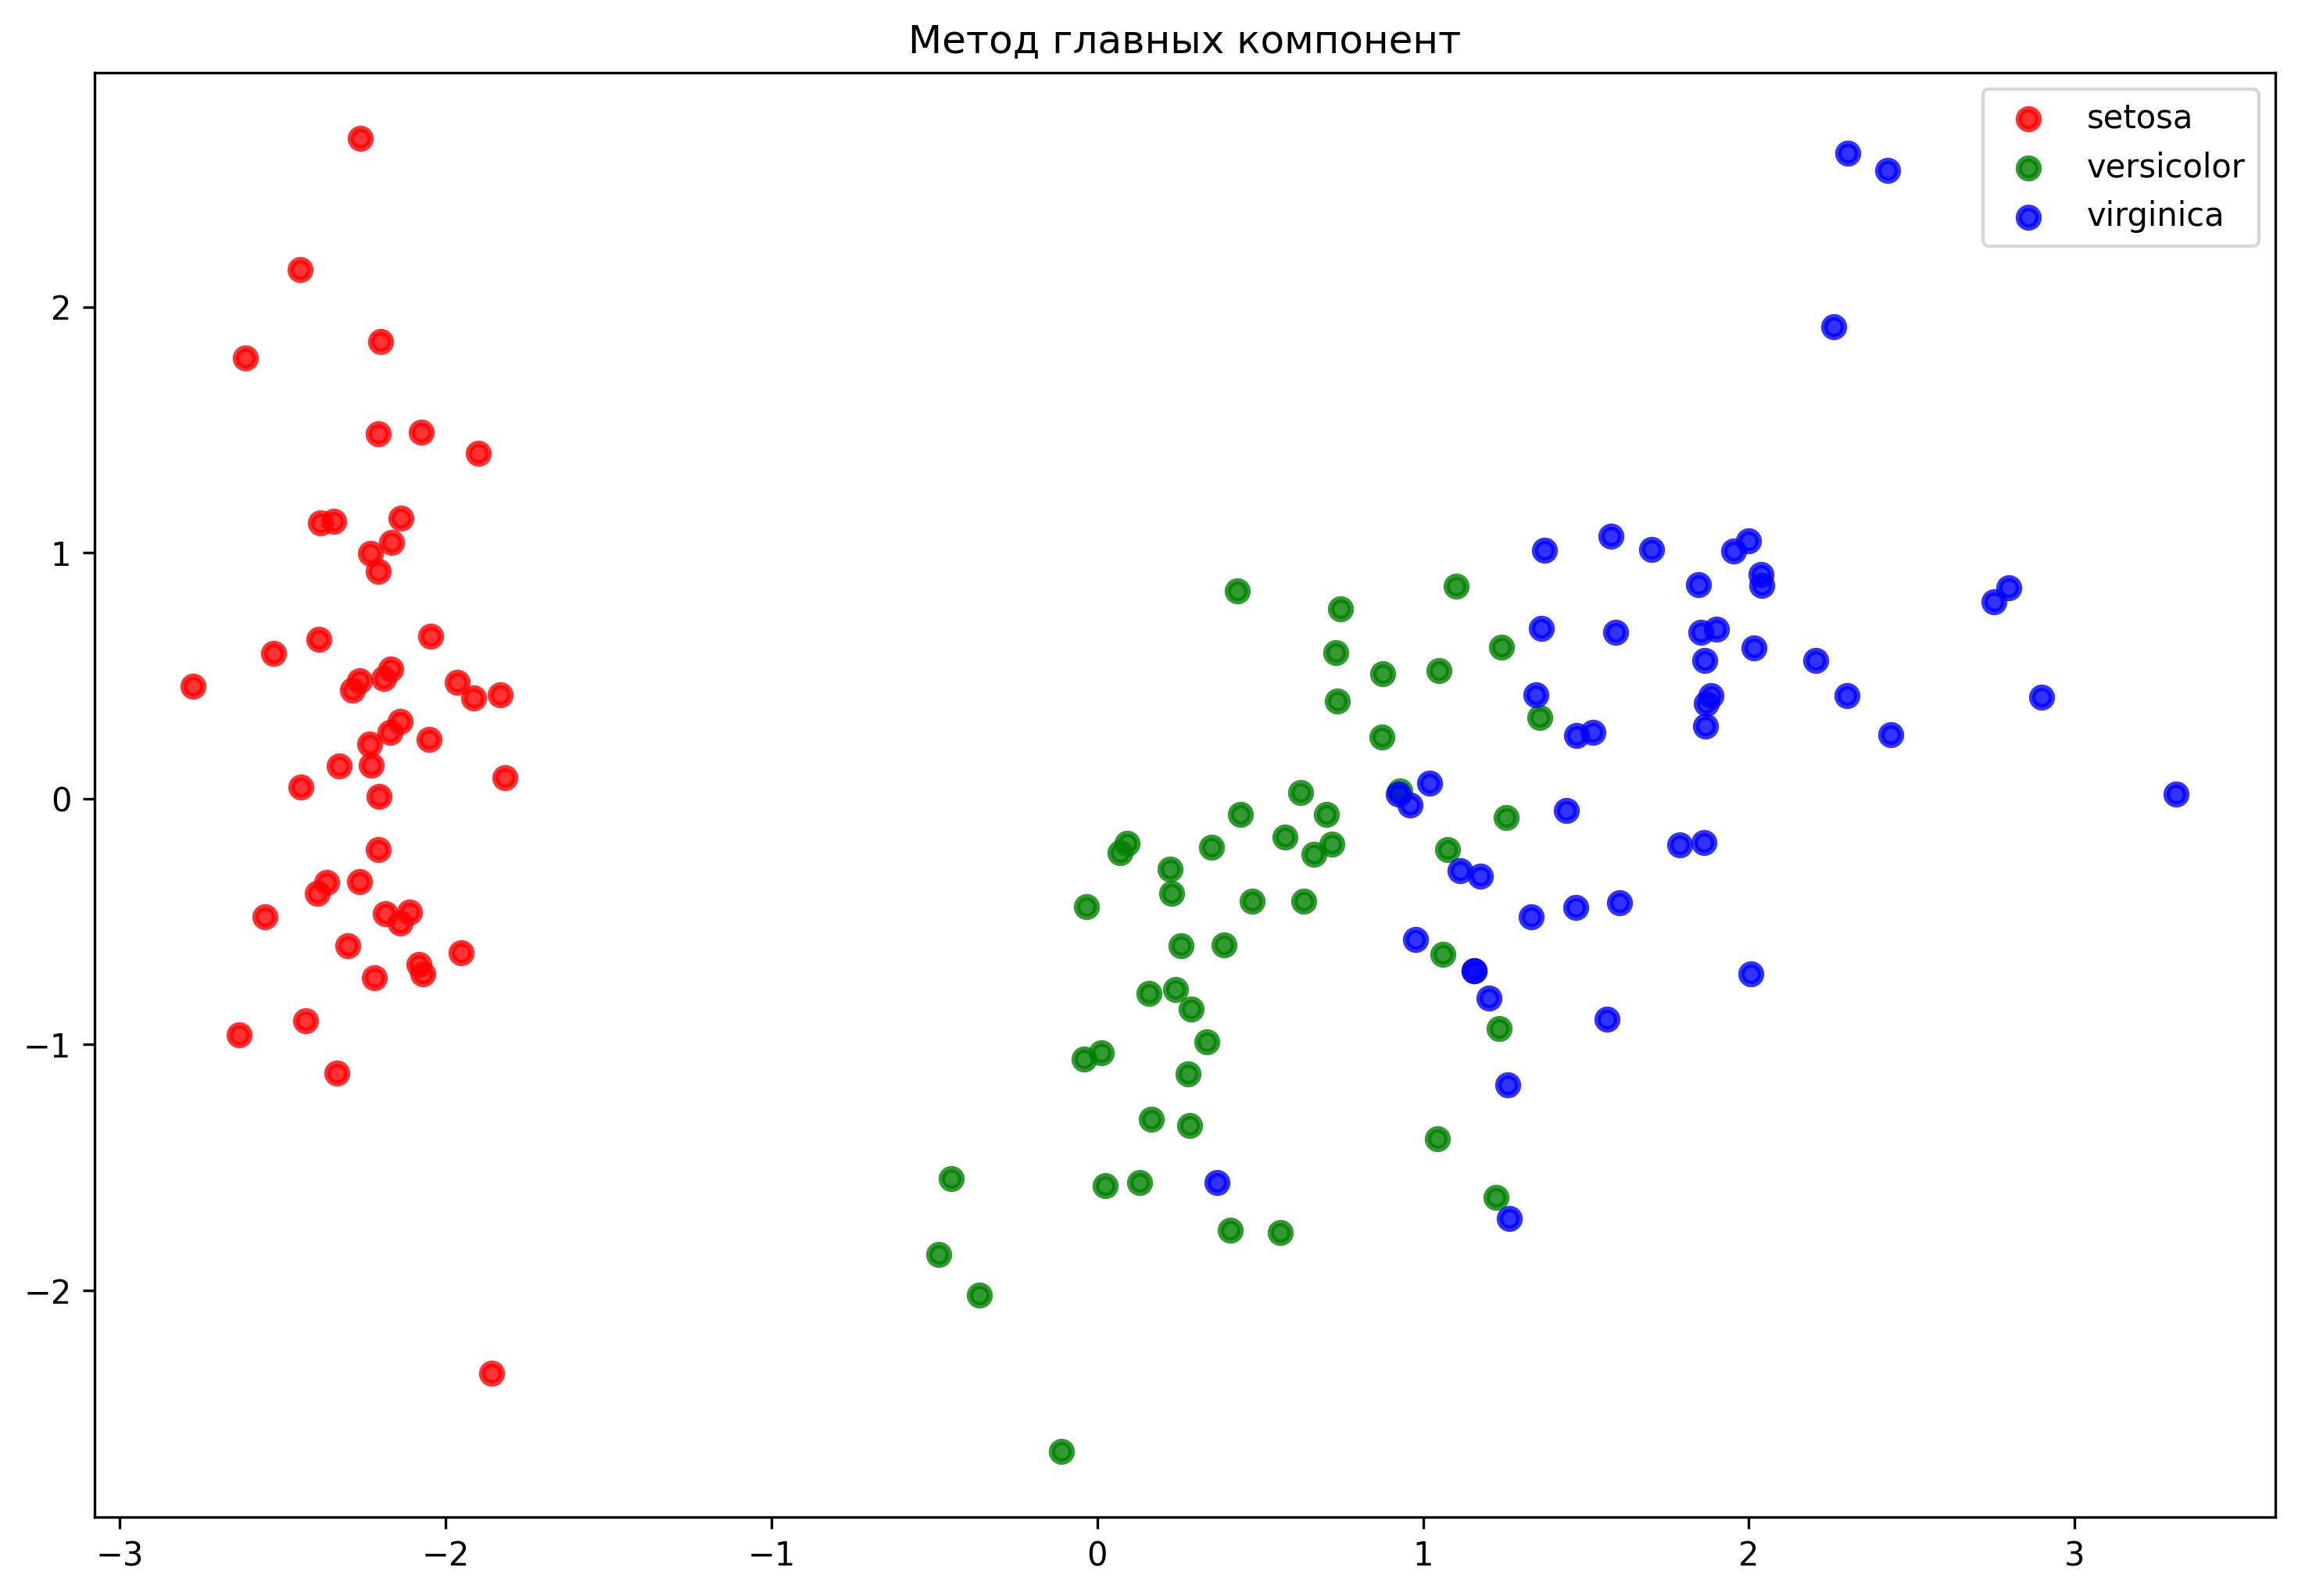

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA, FactorAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE, MDS, Isomap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

iris = datasets.load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
# Стандартизируем входные данные 
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X, y)
colors = ['red', 'green', 'blue']
lw = 2
plt.figure(figsize=(8,6), dpi=300)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Оригинальные данные')
# Инициализируем класс для метода главных компонент
# указываем количество компонент для анализа
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
plt.figure(figsize=(12,8), dpi=300)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r[y == i, 0], X_r[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Метод главных компонент')




### Факторный анализ

Этап 1. Стандартизация данных

Этап 2. Вычисление собственных векторов и собственных значений

Этап 3. Определение количества искомых факторов

Text(0.5, 1.0, 'Факторный анализ')

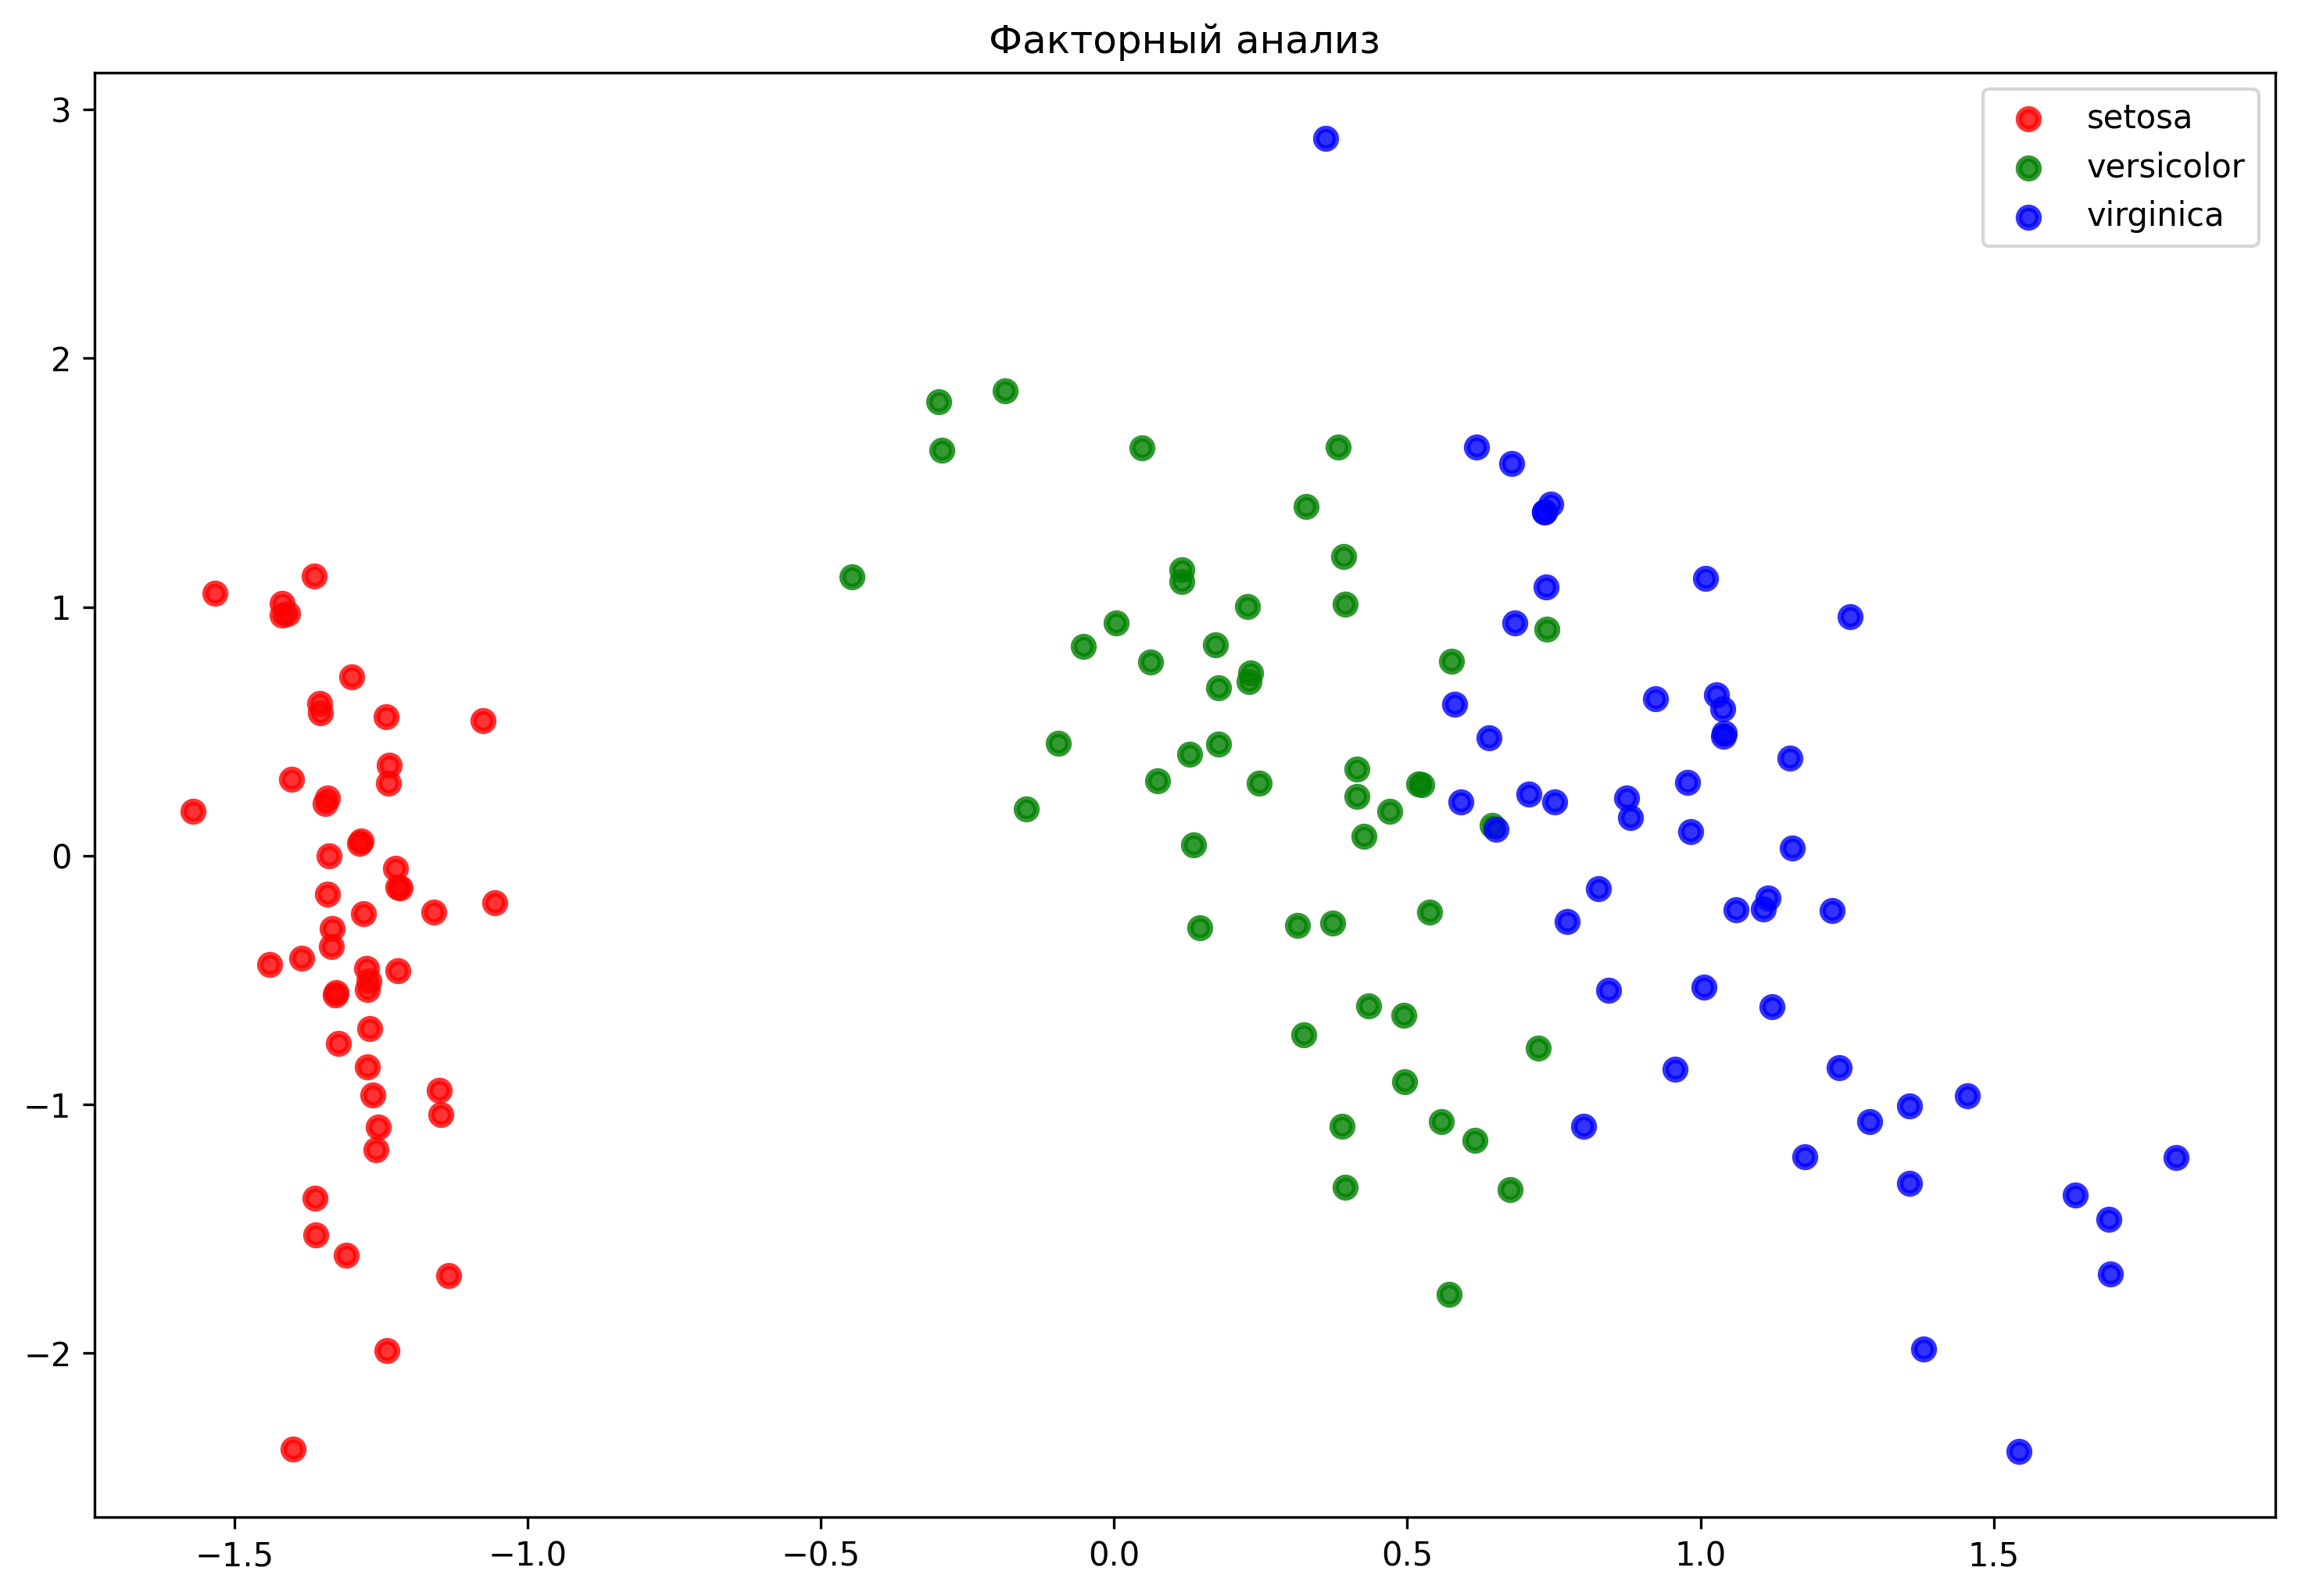

In [9]:
# Инициализируем класс для факторного анализа,
# указываем количество компонент для анализа
fa = FactorAnalysis(n_components=2)
X_r3 = fa.fit_transform(X, y)
plt.figure(figsize=(12,8), dpi=300)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r3[y == i, 0], X_r3[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Факторный анализ')

### Линейный дискриминантный анализ (LDA)

Text(0.5, 1.0, 'Линейный дискриминантный анализ')

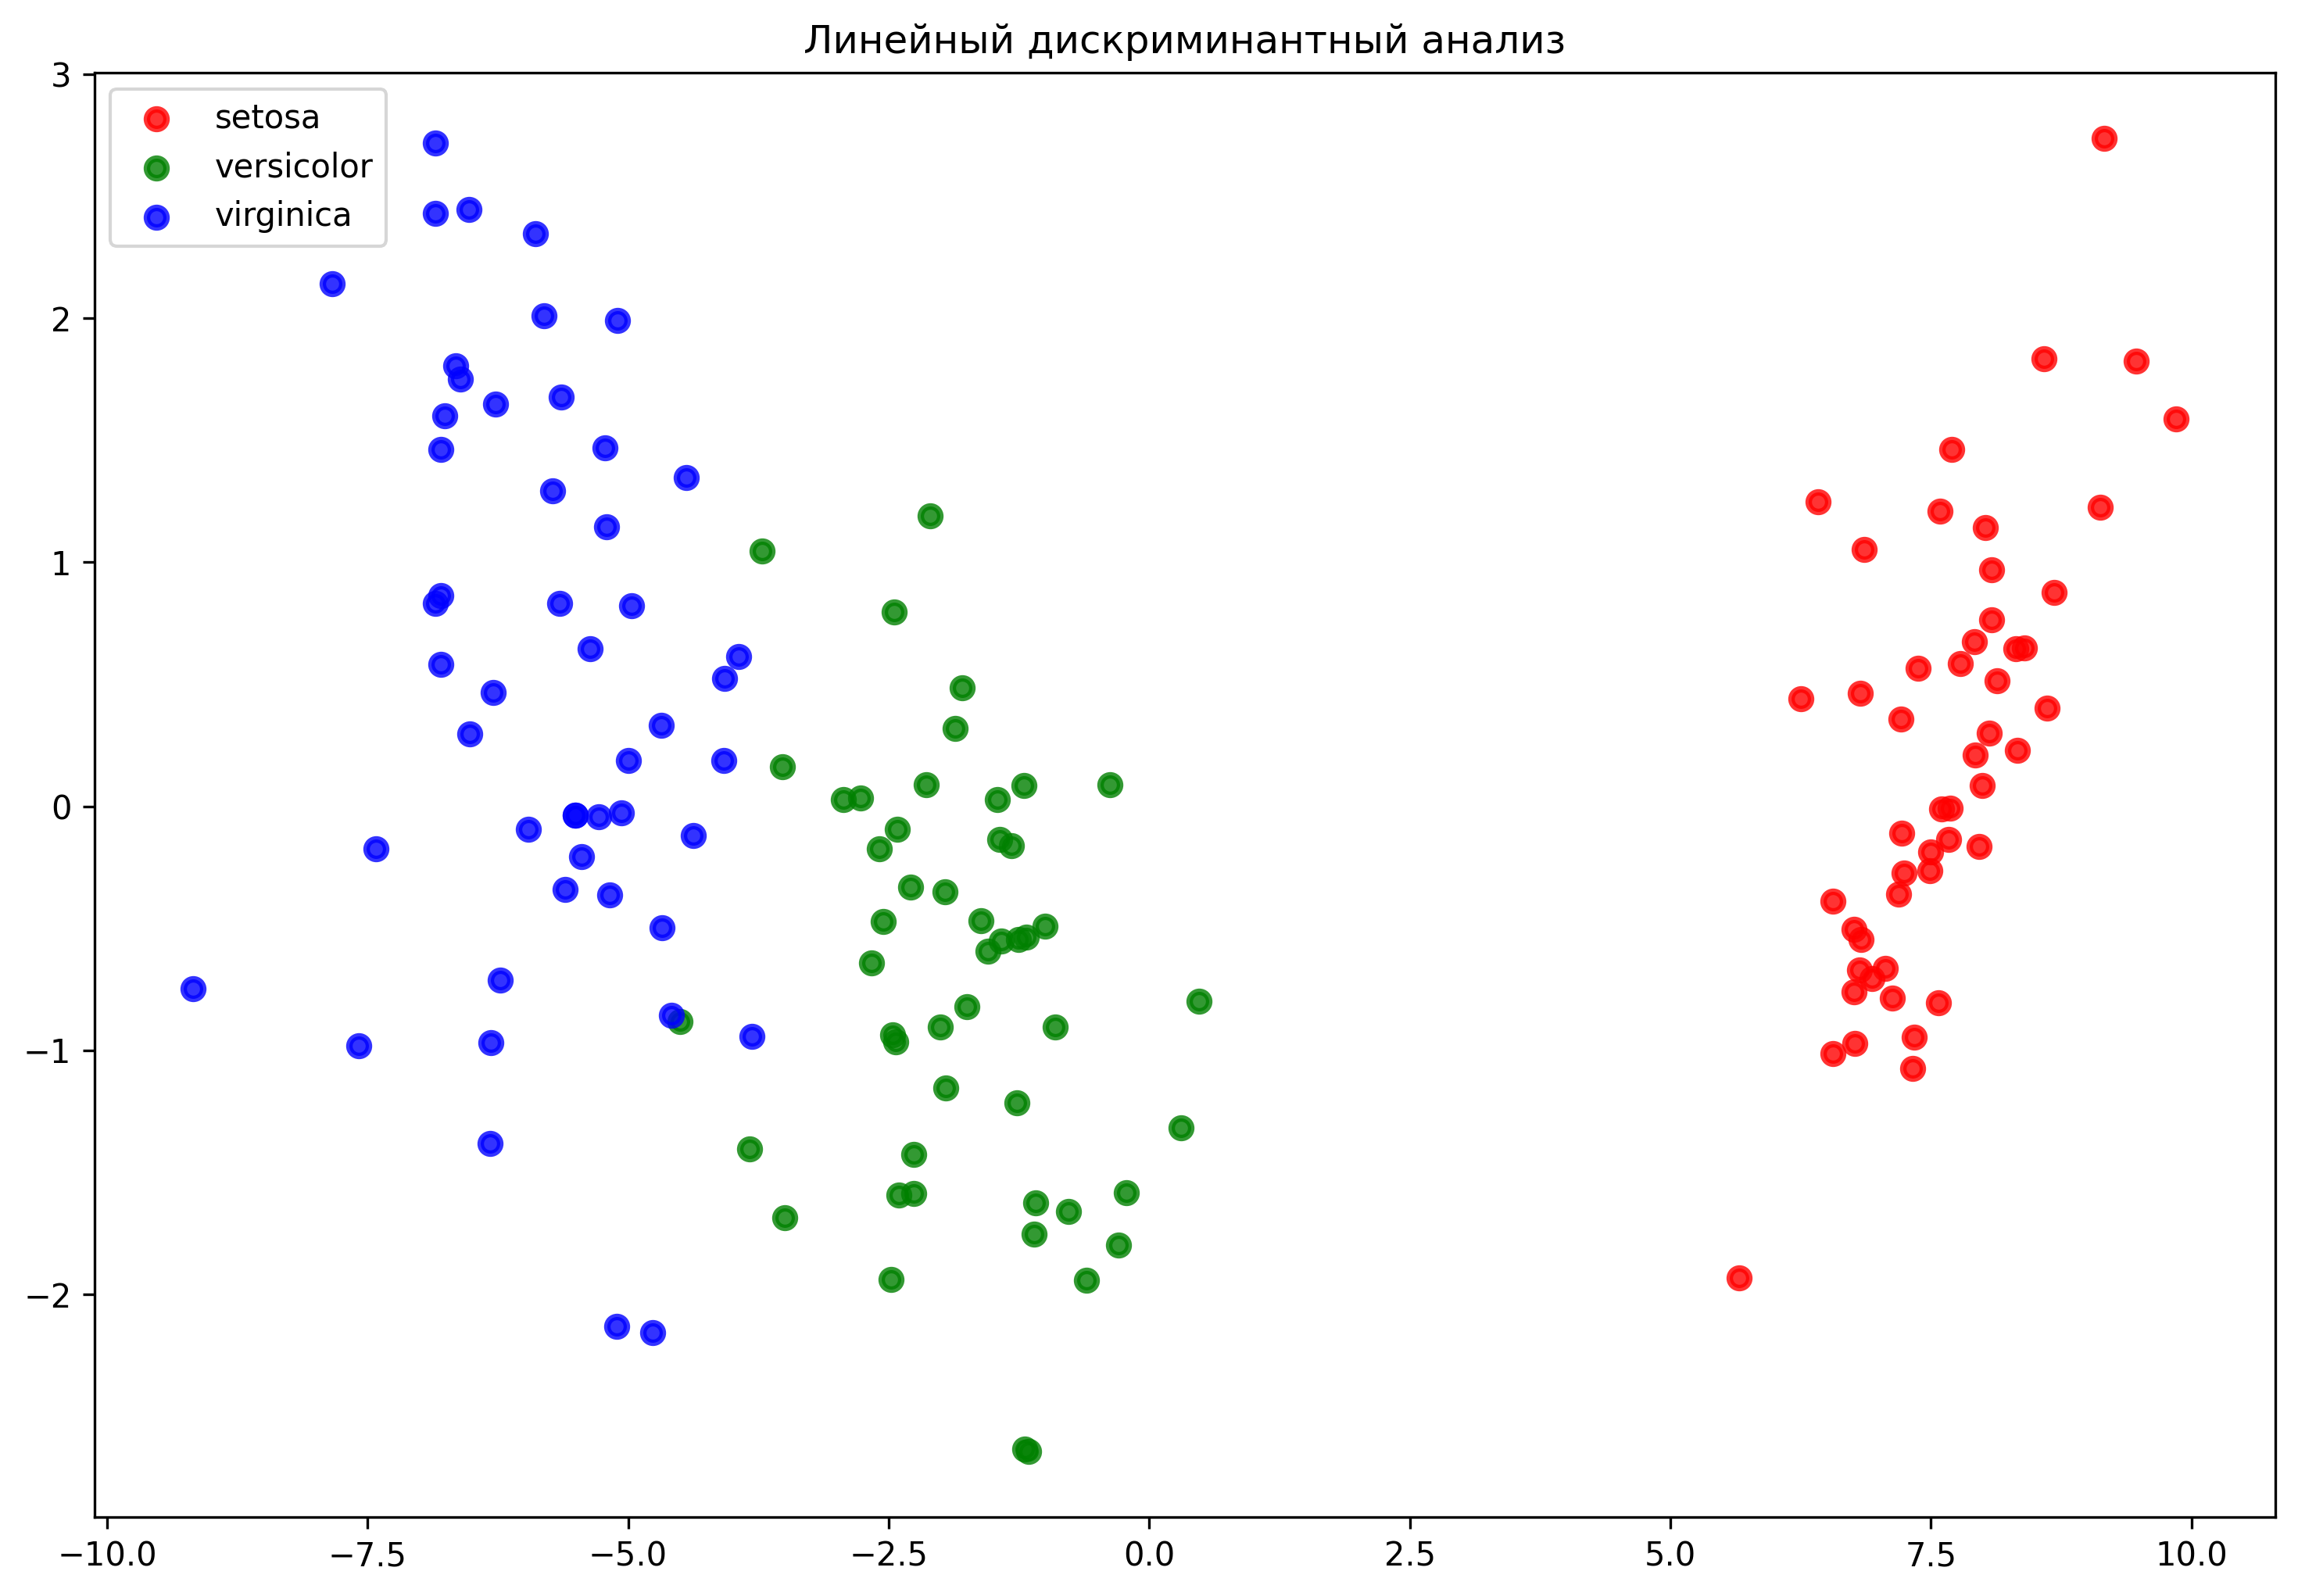

In [10]:
# Инициализируем класс для линейного дискриминанта,
# указываем количество компонент для анализа
lda = LinearDiscriminantAnalysis(n_components=2)
X_r2 = lda.fit(X, y).transform(X)
plt.figure(figsize=(12,8), dpi=300)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i, 0], X_r2[y == i, 1], color=color, alpha=.8, lw=lw, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Линейный дискриминантный анализ')

### Сингулярное разложение матрицы

Text(0.5, 1.0, 'Сингулярное разложение')

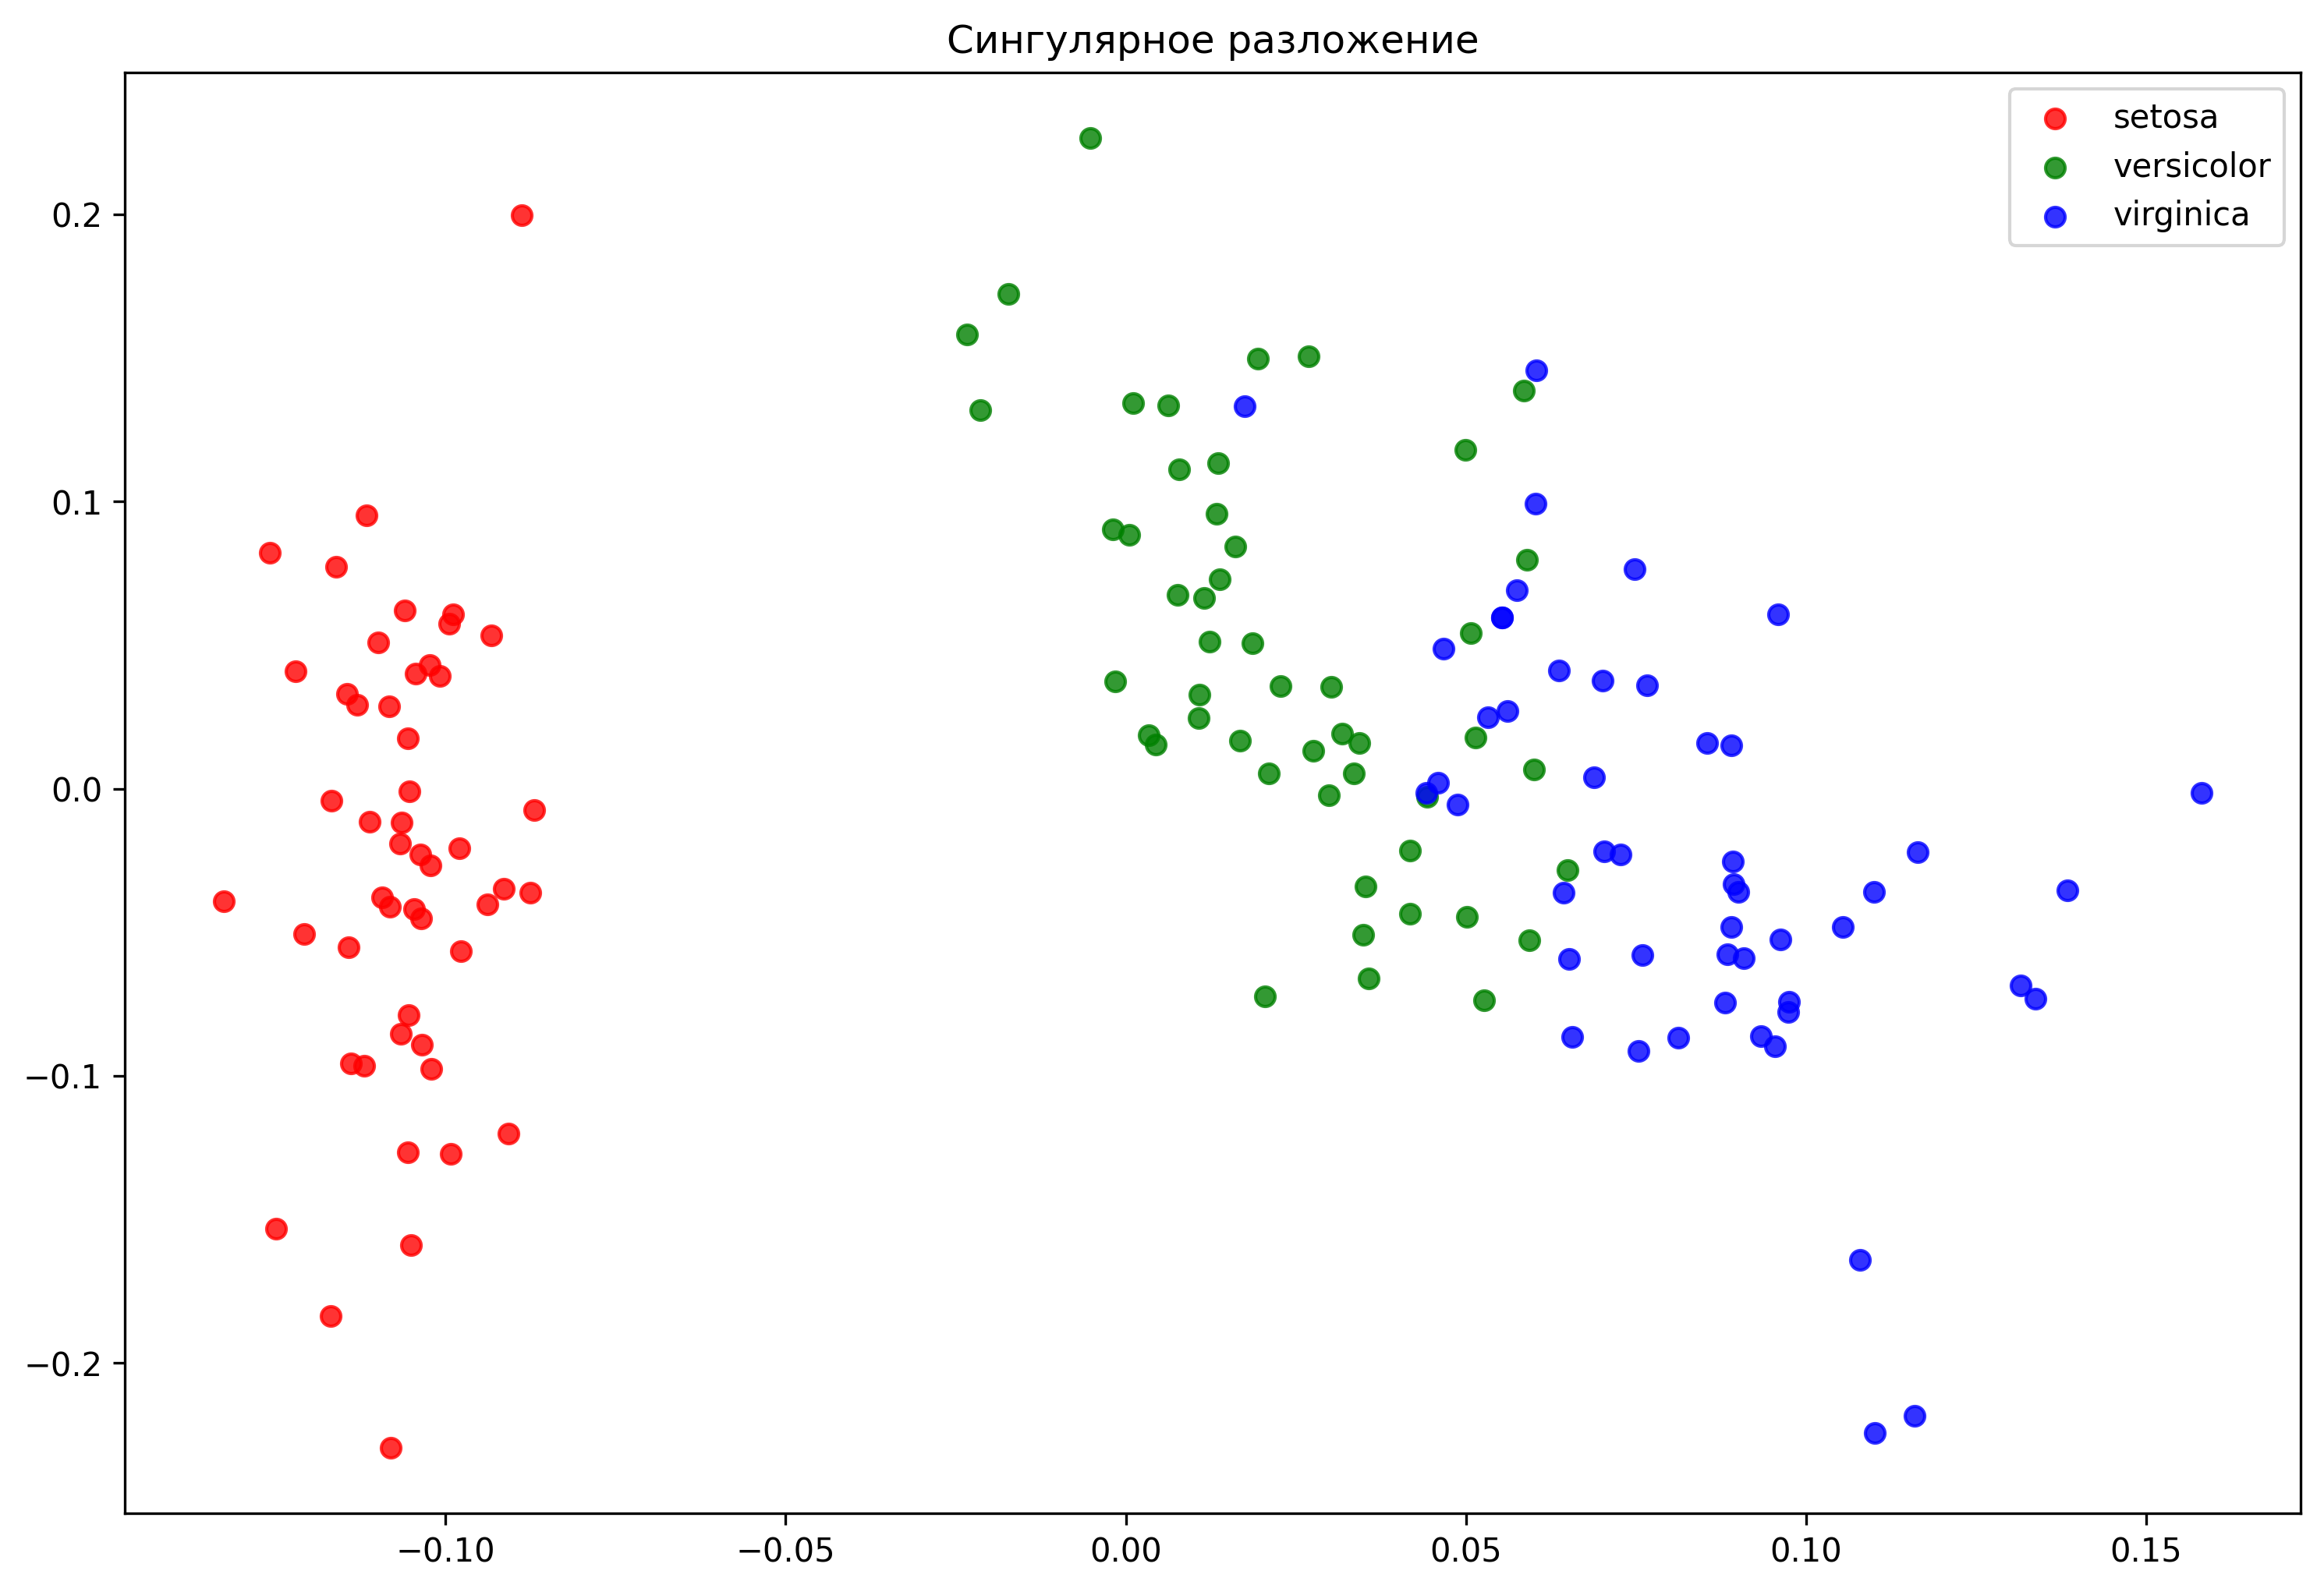

In [11]:
# Вычисляем сингулярное разложение
U, S, Vt = np.linalg.svd(X)
plt.figure(figsize=(12,8), dpi=300)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(U[y == i, 0], U[y == i, 1], alpha = .8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Сингулярное разложение')

## Нелинейные методы

### Ядерный метод главных компонент

Этап 1. Отображение оригинальных линейно неразделимых данных в признаковое пространство большей размерности с помощью специальной функции - ядра

Этап 2. Поиск главных компонент "стандартным" методом главных компонент

C:\Users\USER\miniconda3\Lib\site-packages\sklearn\manifold\_isomap.py:383: UserWarning: The number of connected components of the neighbors graph is 2 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\USER\miniconda3\Lib\site-packages\scipy\sparse\_index.py:102: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


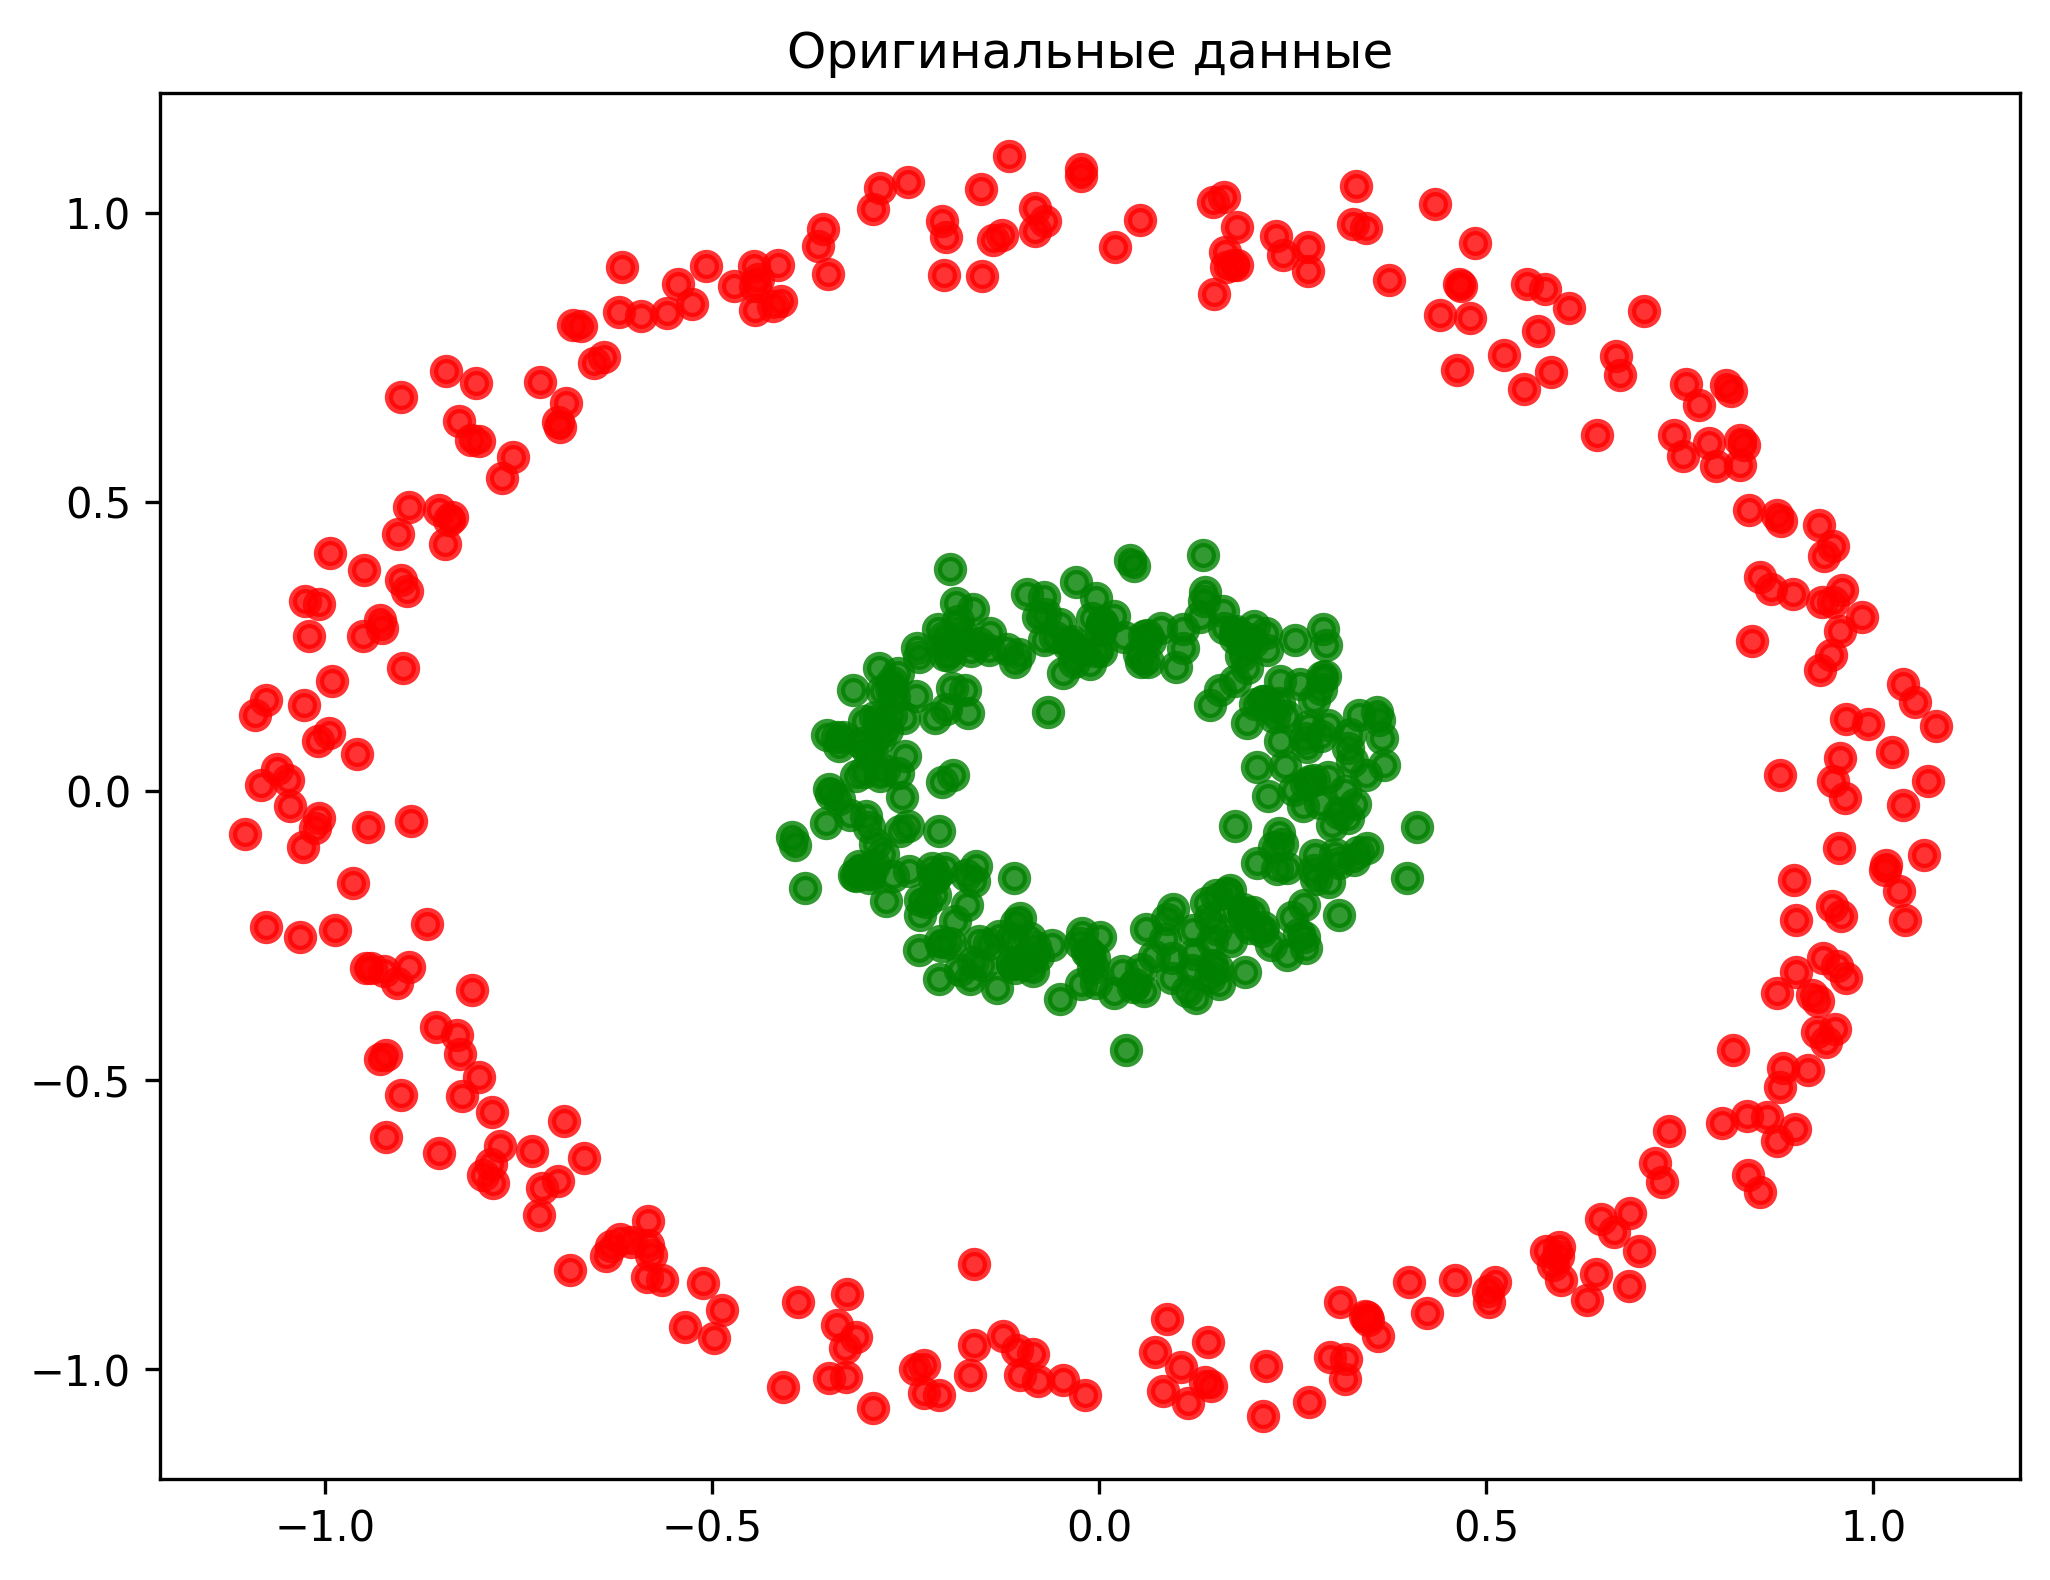

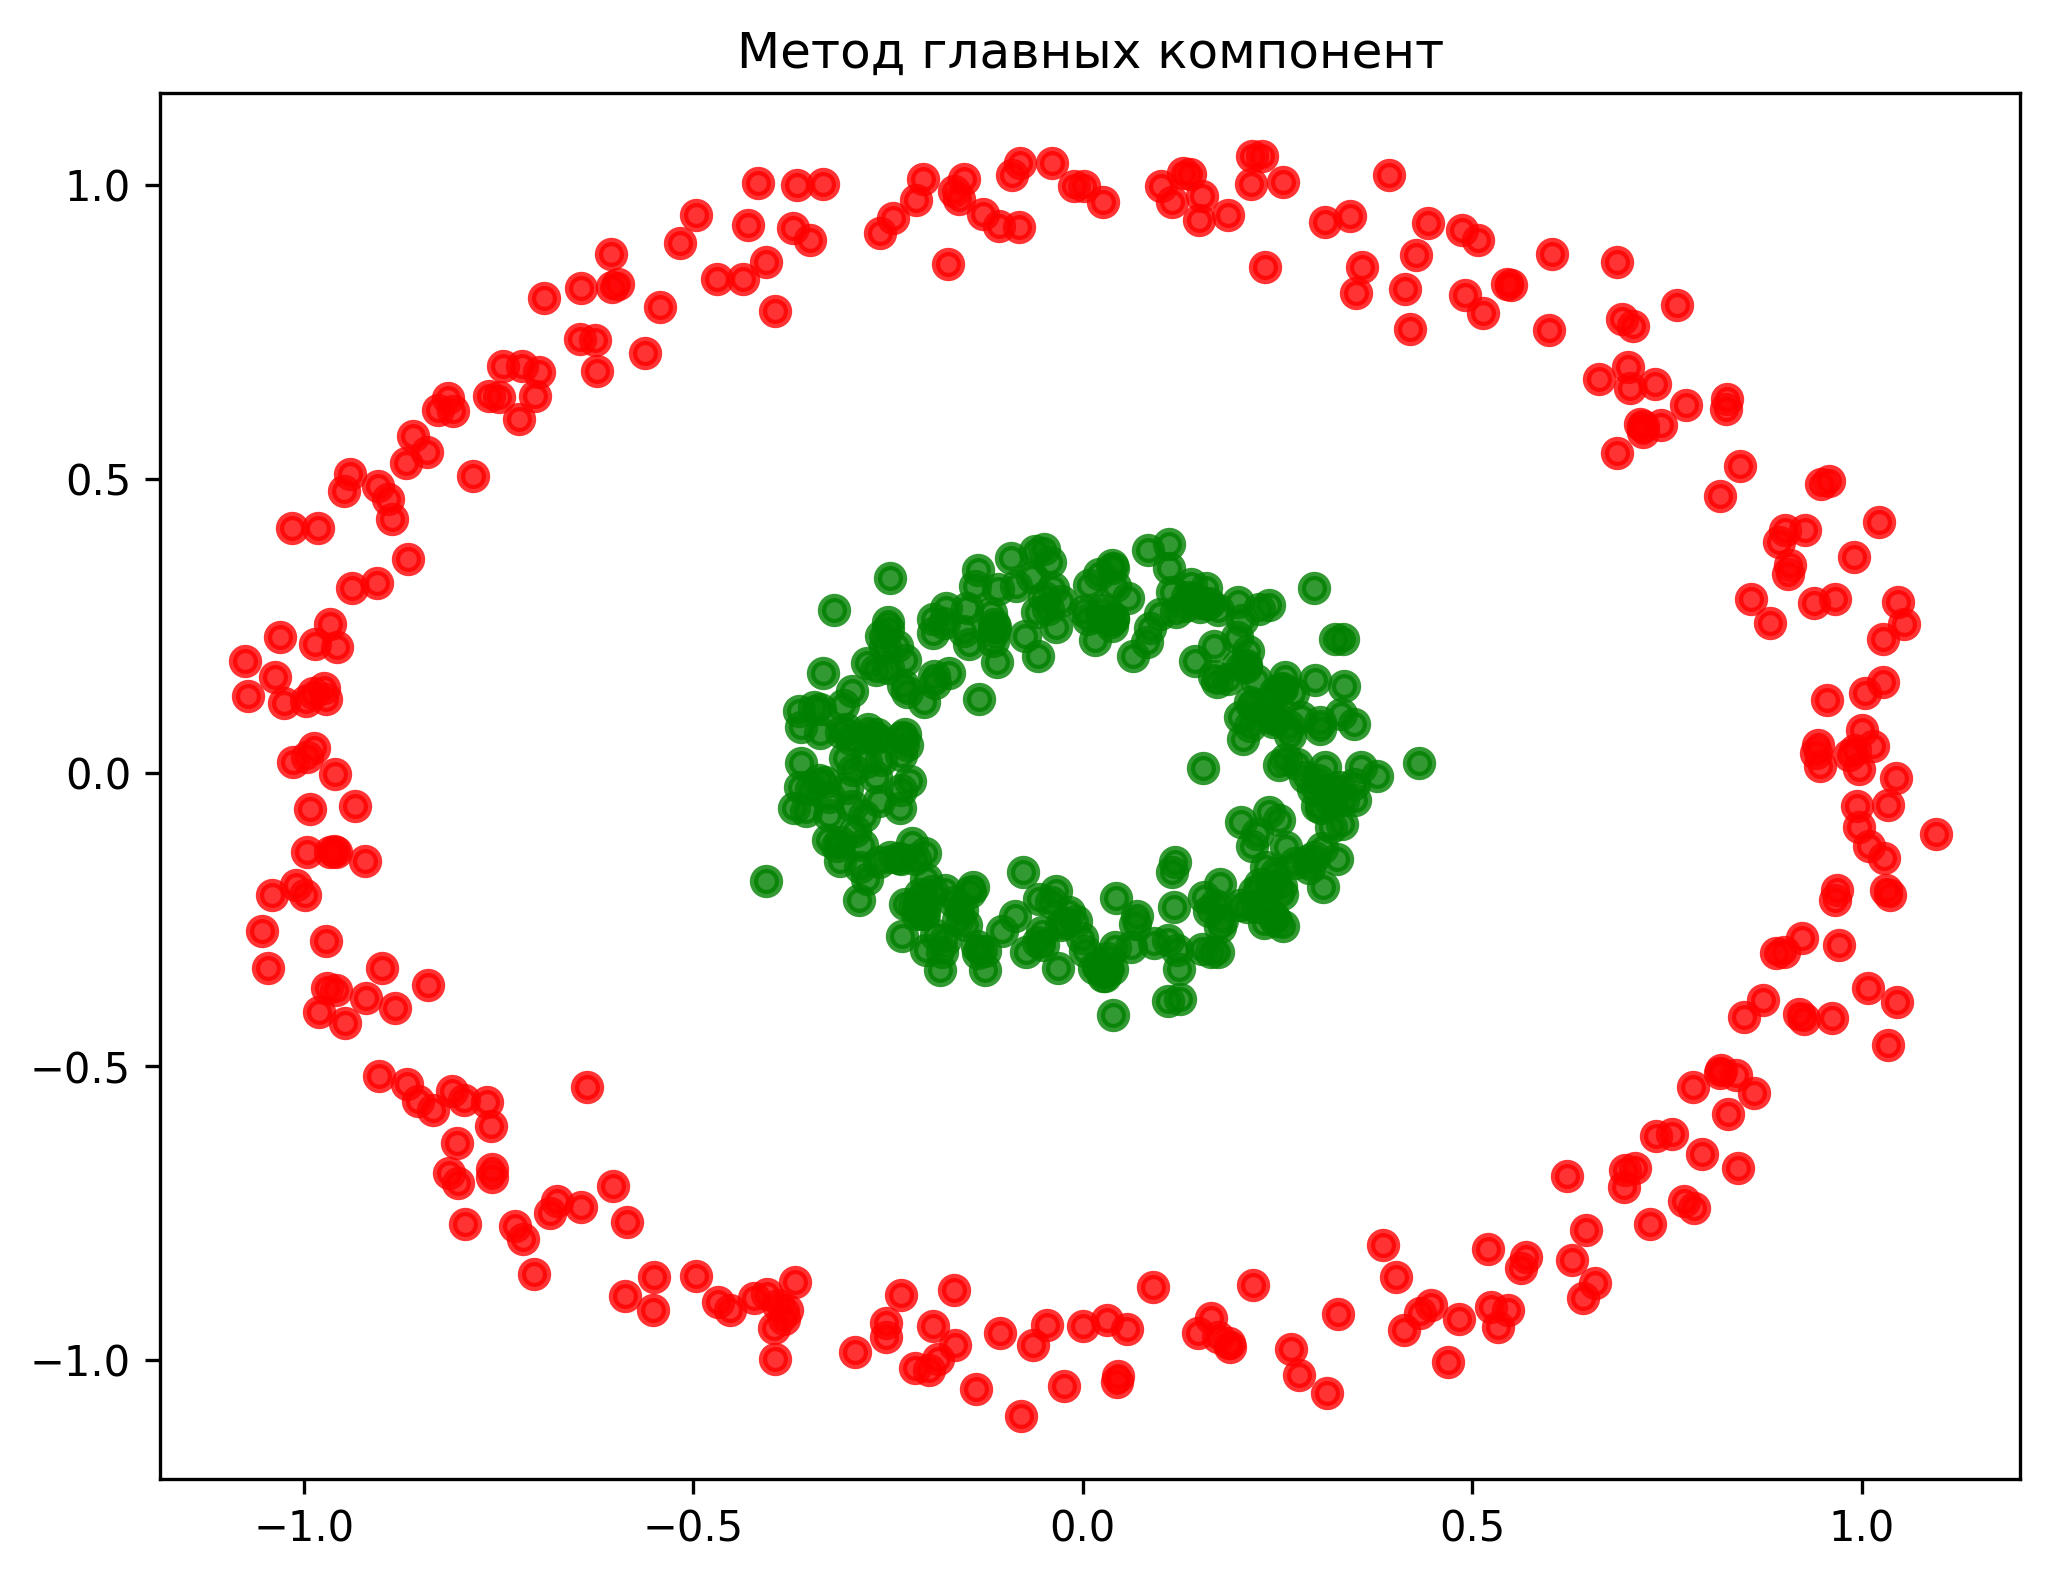

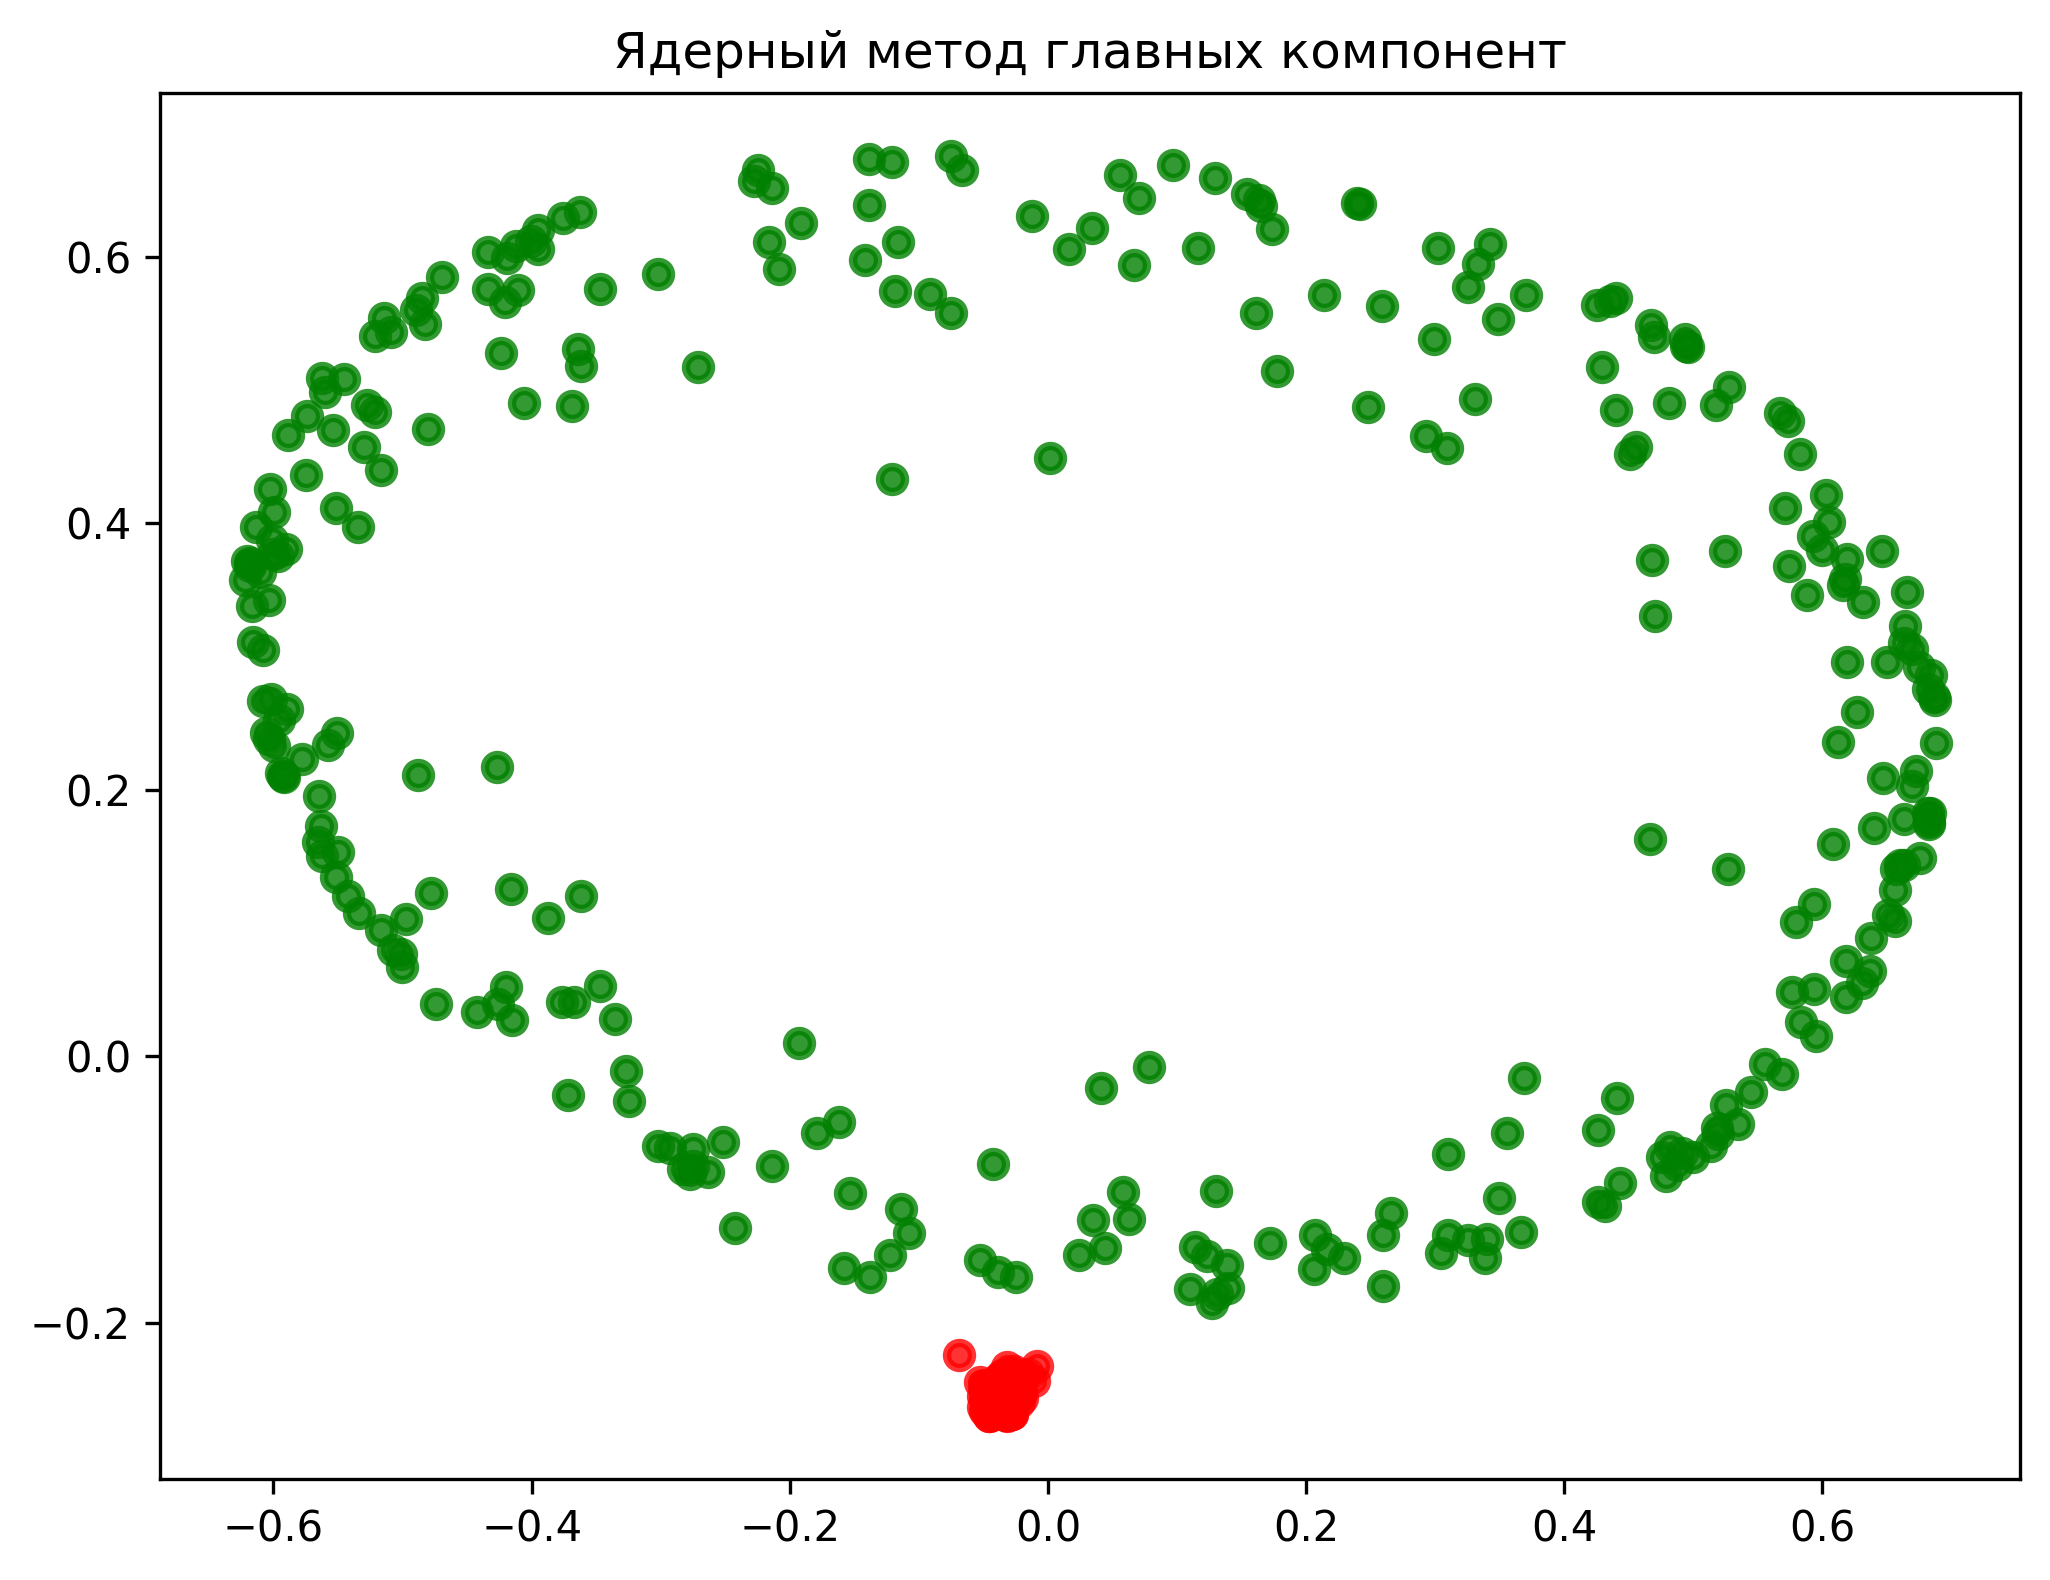

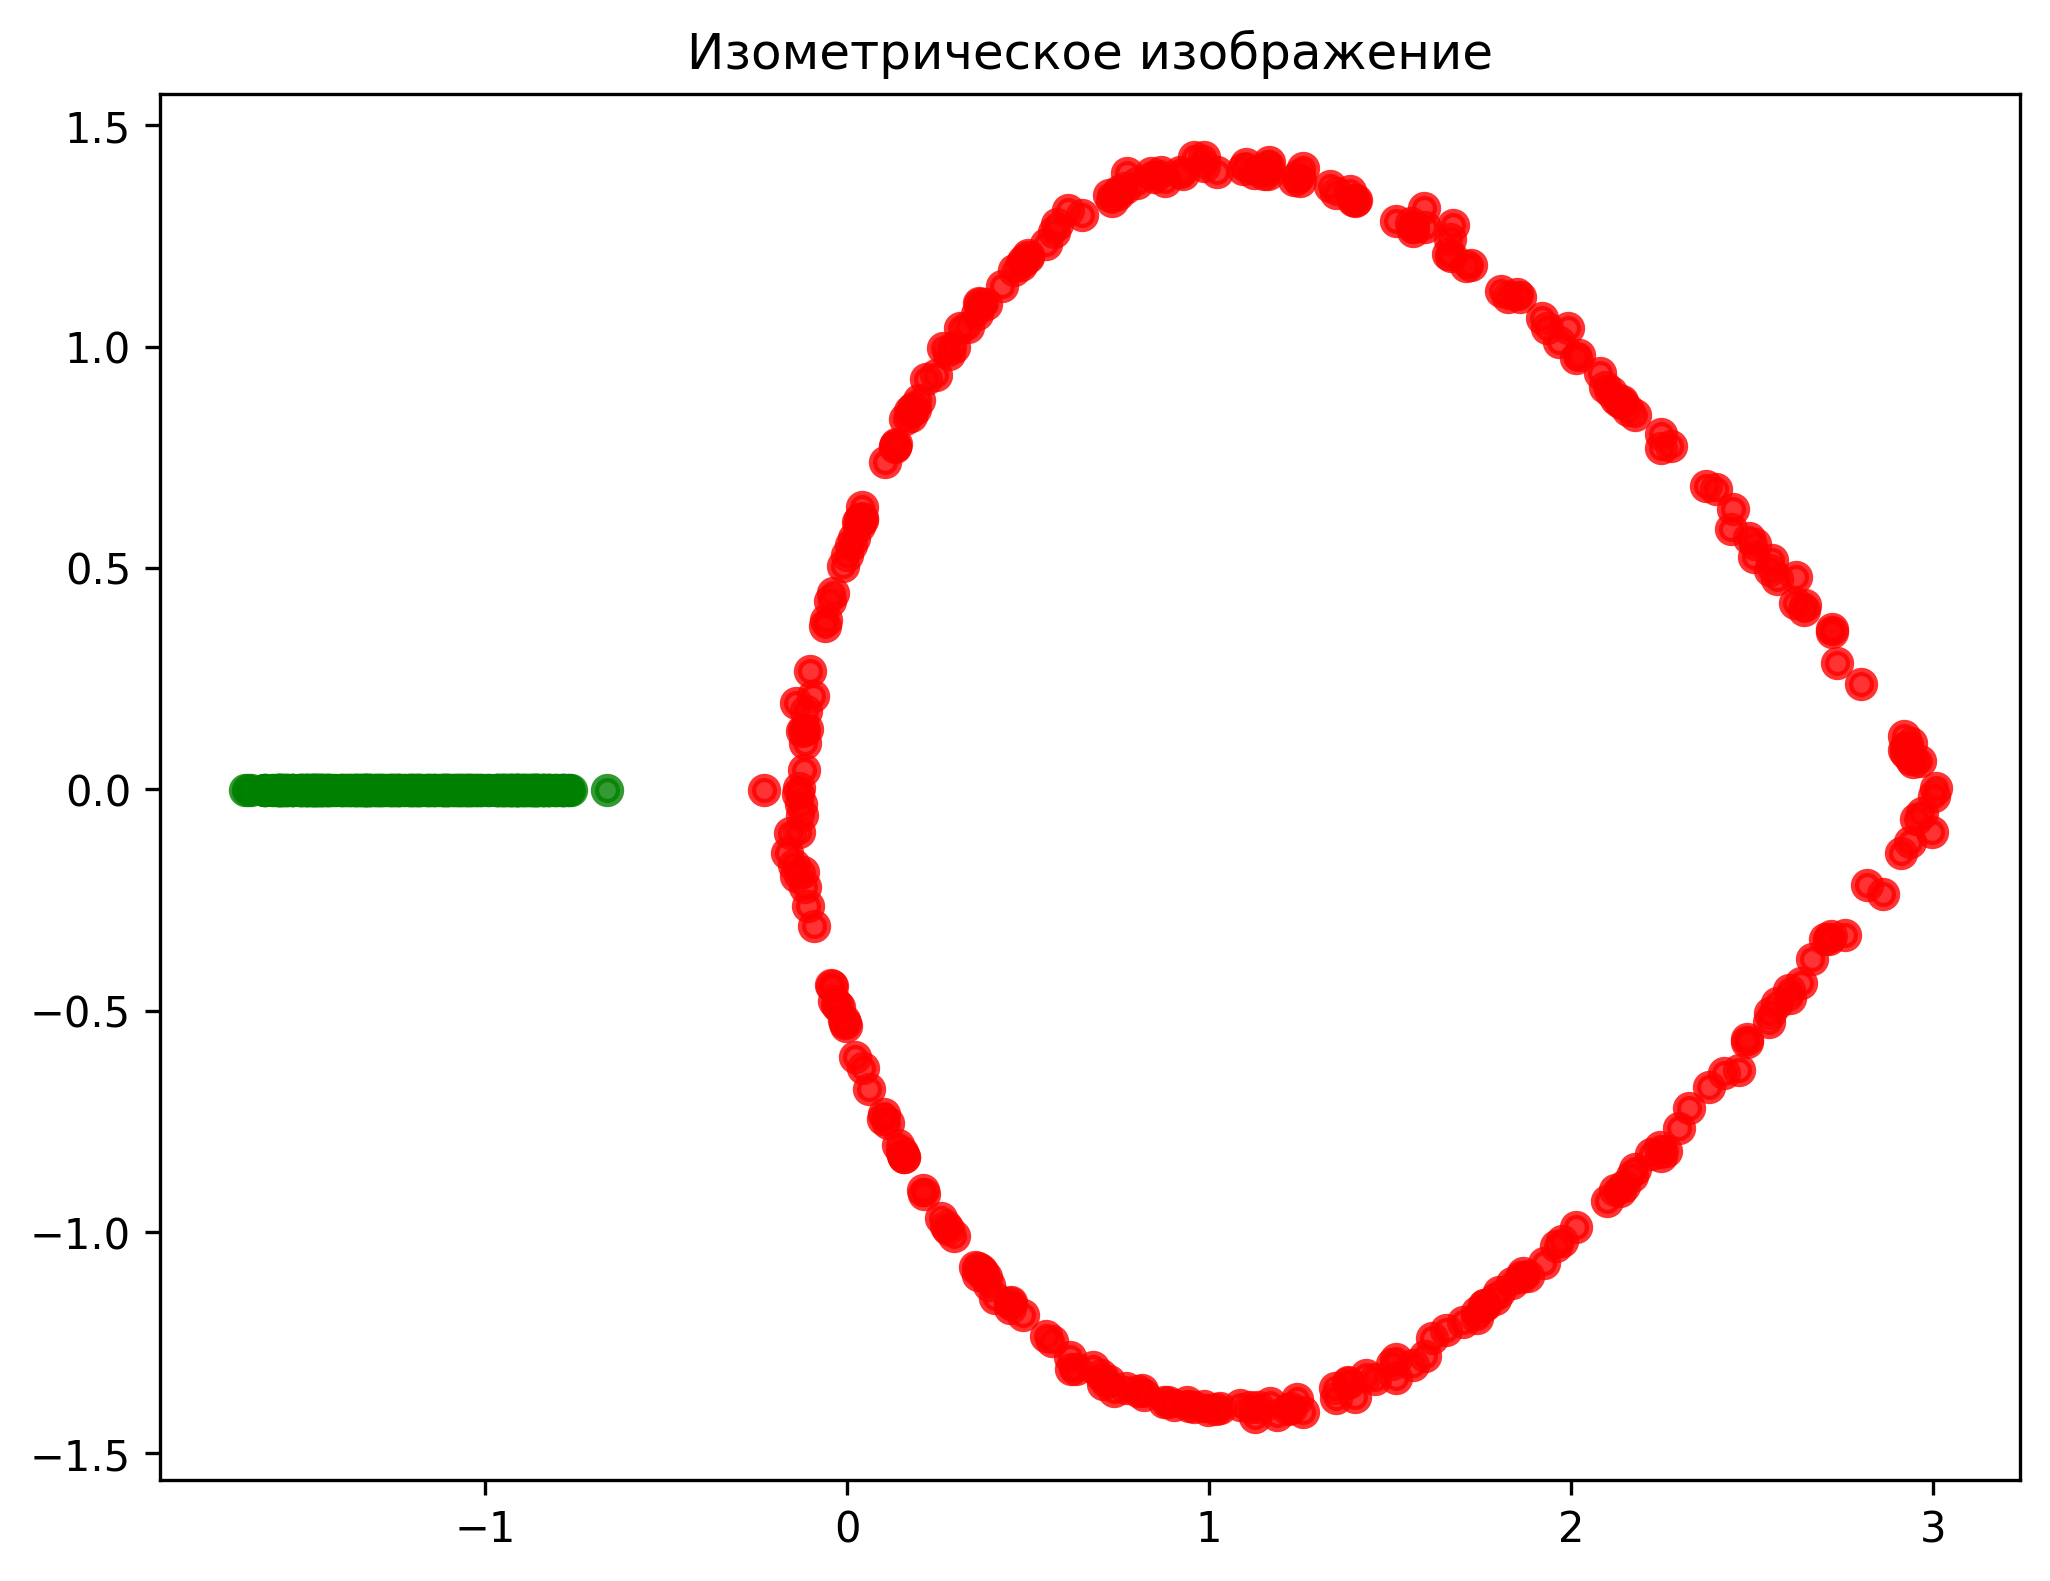

In [16]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=600, factor=.3, noise=.05)
# std_scaler = StandardScaler()
# X = std_scaler.fit_transform(X, y)

kernels = ["linear", "poly", "rbf", "sigmoid", "cosine", "precomputed"]

kpca = KernelPCA(n_components=2, kernel="rbf", fit_inverse_transform=False, gamma=10)
X_kpca = kpca.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

iso = Isomap(n_neighbors=10, n_components=2)
X_iso = iso.fit_transform(X)

colors = ['red', 'green']

plt.figure(figsize=(8,6), dpi=300)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=.8, lw=lw)
plt.title('Оригинальные данные')

plt.figure(figsize=(8,6), dpi=300)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=lw)
plt.title('Метод главных компонент')

plt.figure(figsize=(8,6), dpi=300)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_kpca[y == i, 0], X_kpca[y == i, 1], color=color, alpha=.8, lw=lw)
plt.title('Ядерный метод главных компонент')

plt.figure(figsize=(8,6), dpi=300)
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_iso[y == i, 0], X_iso[y == i, 1], color=color, alpha=.8, lw=lw)
plt.title('Изометрическое изображение')

plt.show()

# Стохастическое вложение соседей с t-распределением

### Алгоритм стохастического вложения соседей с t-распределением

Text(0.5, 1.0, 'Стохастическое вложение соседей t-распределением')

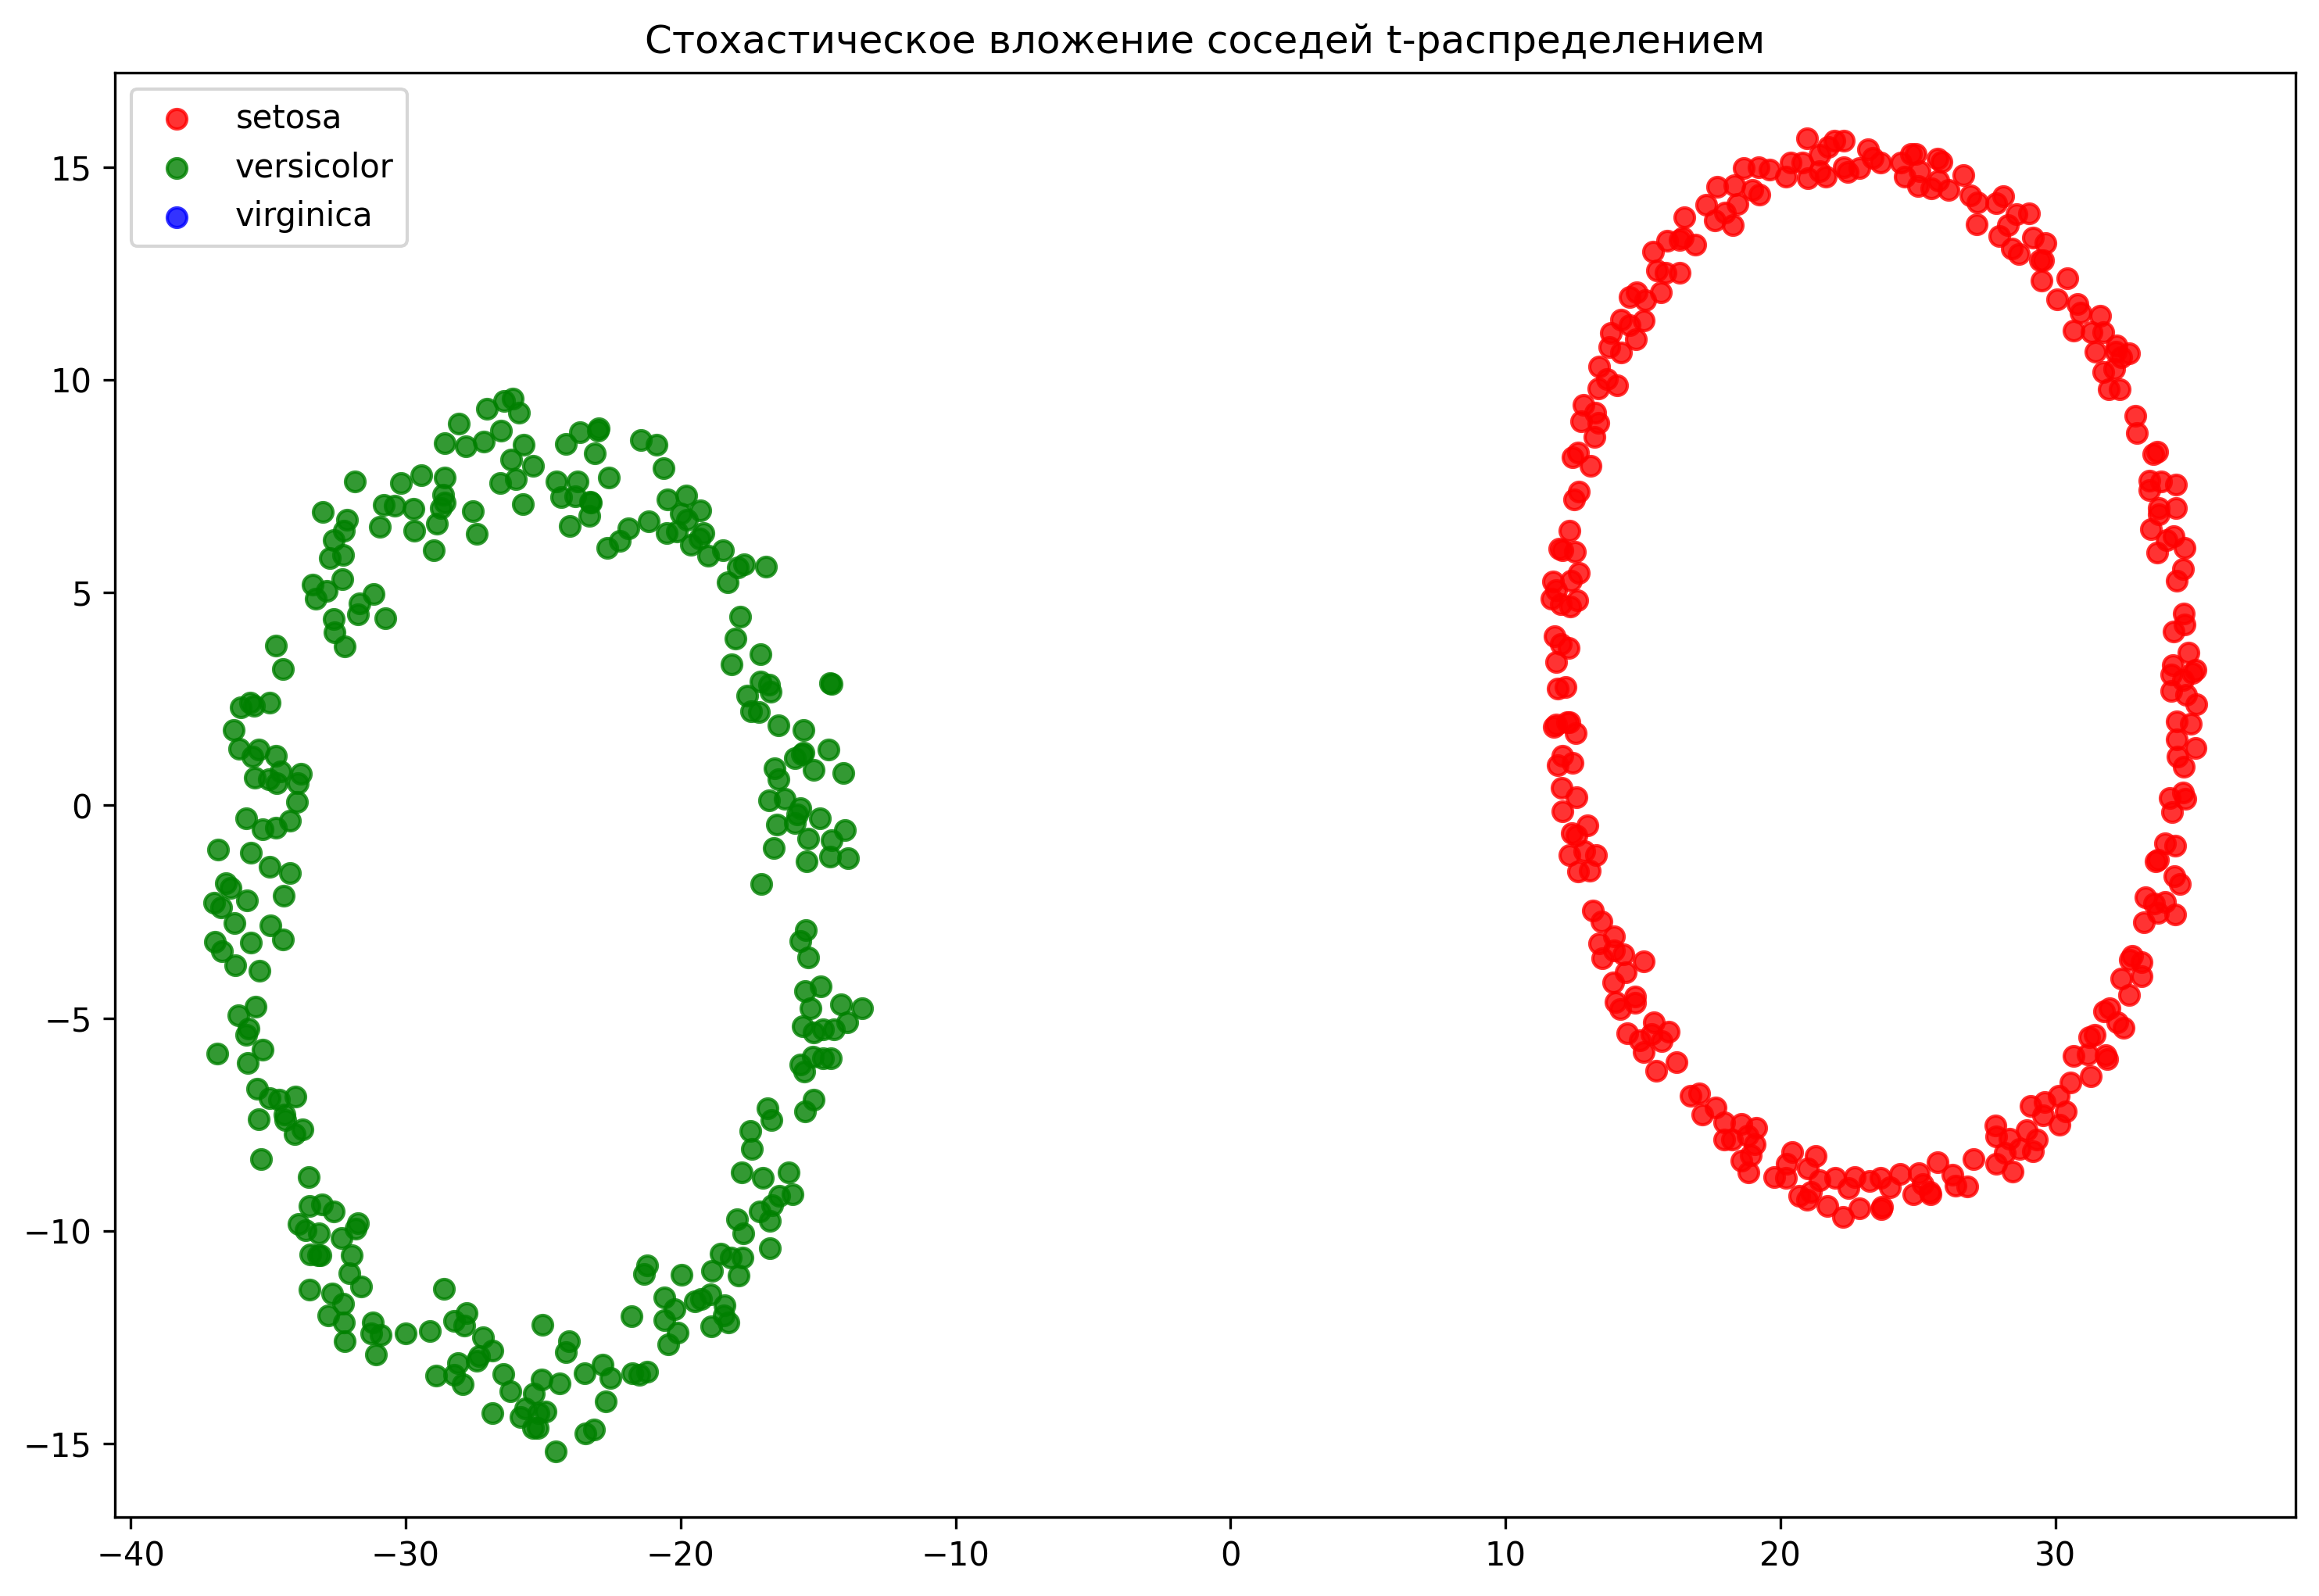

In [24]:
# Инициализируем класс для стохастического вложения соседей с t-распределением
colors = ['red', 'green', 'blue']
tsne = TSNE(n_components=2, init='pca', random_state=0)
X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,8), dpi=300)
for color, i, target_name in zip(colors, [0, 1, 2], target_names):
    plt.scatter(X_tsne[y == i, 0], X_tsne[y == i, 1], alpha=.8, color=color, label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('Стохастическое вложение соседей t-распределением')

### К - ближайших соседей (knn)


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
X, y = datasets.load_iris(return_X_y=True)
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X, y)
X_train, X_test, y_train, y_test = train_test_split(X[:, 0:2], X[:, 2], shuffle=True, train_size=0.8, random_state=42)

knn_regressor = KNeighborsRegressor().fit(X_train, y_train)
knn_regressor.score(X_test, y_test)

0.9370311731900395

In [57]:
X, y = datasets.load_iris(return_X_y=True)
X = std_scaler.fit_transform(X, y)

knn_classifier = KNeighborsClassifier().fit(X[:120], y[:120])
knn_classifier.score(X[120:], y[120:])

0.7666666666666667

In [58]:
print('Hello world! >_<')

Hello world! >_<
